# Fraud Detection on Credit Card Transactions

Sections:<br>
1. [Introduction](#Introduction)<br>
1. [Data Exploration](#Data-Exploration)<br>
2. [Dataset](#Dataset) <br>
3. [Data Preprocessing](#Data-Preprocessing) <br>
4. [LightGBM](#LightGBM)<br>
        5.1 [Evaluation metrics, Performance metric](#Evaluation-metrics,-Performance-metric)<br>
        5.2 [LightGBM Results](#LightGBM-Results)<br>
5. [Logistic Regression Results](#Logistic-Regression)<br>
        6.1 [Logistic Regression with PCA](#Logistic-Regression-with-PCA)<br>
        6.2 [Logistic Regression with PCA/Resampling](#Logistic-Regression-with-PCA/Resampling)<br>
7. [Random Forest](#Random-Forest)<br>
        7.1 [Random Forest with Undersampling](#Random-Forest-with-Undersampling)<br>
        7.2 [Random Forest with Oversampling](#Random-Forest-with-Oversampling)<br>
        7.3 [Random Forest Results](#Random-Forest-Evaluation)<br>
6. [Conclusion](#Conclusion)<br>
7. [References](#References)

# Introduction

### The problem

Credit card fraud occurs when an unauthorized person gains access to your information and uses it to make purchases. 

There are two distinct types of card fraud: (1) card-not-present fraud, i.e. fraud conducted remotely in online and telephone payments, using card details obtained by scams such as phishing.; and (2) card-present fraud, which typically occurs at retail outlets and ATMs and involves the use of counterfeit/skimmed cards.

Card fraud is one of the most prevalent kinds of fraud in the world that amounts to billions of financial losses annually. Over time multitude of solutions have been introduced to fight this multifaceted crime, ranging from replacement of magnetic swipe cards with chip card to sophisticated AI-driven fraud detection systems. While these approaches have proven beneficial, criminals are adapting, and fraud is still present to similar extent. Thus affected parties need to remain vigilant, and refine their detection methods.

### Statistics

Recent statistics provided by the [Eurosystem](https://www.ecb.europa.eu/pub/pdf/cardfraud/ecb.cardfraudreport202110~cac4c418e8.en.pdf):
1. Card fraud in 2019 amounted to €1.87 billion(0.036%) of the total value of card payments €5.16 trillion made using cards issued in the Single Euro Payments Area (SEPA). Card fraud in 2021 continued its downward trend, falling to its lowest level since data collection began. It constituted 0.028%. The highest share of card fraud observed to date was 0.048% in 2008. 
2. Delayed debit and __credit card transactions__ (0.088% from total fraud share) appear more affected by fraud than debit card payments(0.016%).
3. More than half of the total value of fraud in 2019 was related to __cross-border transactions__ within SEPA.
4. From a geographical perspective, domestic transactions accounted for 89% of the value of all card transactions in 2019, but only 35% of fraudulent transactions. Cross-border transactions within SEPA represented 9% of all card transactions in terms of value, but 51% of those reported fraud.

USA statistics:<br>
1. Financial losses in 2021 amounting to $32.34 billions have increased compared to previous years. More data [here](https://www.bankrate.com/finance/credit-cards/credit-card-fraud-statistics/#fraud).
2. Most common age range to experience fraud in 2021 is 30-39. They represent one-third of credit card fraud reports among all age groups.

### Techniques and challenges

Anti-fraud prevention is done by analyzing user behavior patterns, transaction details, and many other signals like login, money transfer operations that help specialists make informed decisions.

There are countless transaction fraud schemes, with new vectors of attack emerging often. Some of the __challenges__ of developing fraud detection tools include:
- __false positives__ - Occurs when monitoring system is imprecise, and places false flags on legitimate cases.
- __complex rules__ - With a lot of complex rules in place, monitoring cases gets difficult and scaling becomes a challenge as the system will not be able to keep up with demand.
- __unusual transactions__ - Fraudsters will go to lengths to conceal their activity. Detecting sophisticated fraud or ML/TF patterns requires a well-designed detection system .
- __risk-based optimization__ - Finding the balance between strong protection and optimal conversion rates is difficult, as the process has to be customized for various risk levels, user groups, and regions. 
- __insufficient case management__ - Poor delegation of casework, low-quality inspection tools, and inconclusive data analysis leads to overlooked cases.

__Fraud Detection Techniques__<br>
Techniques for fraud detection typically include data analysis in some form. Such approaches can be broadly classified into AI-based and statistical data analysis methods.

__Statistical analysis__ - 
As the name suggests, this includes different statistical operations like evaluating different _statistical parameters_(average, quantiles, metrics etc.), _probability distributions and models_, _data matching_, _regression analysis_.


__AI-based approach__ - 
AI has emerged as the clear front-runner in the race for more efficient scam detection technologies and includes: _data mining_ (classification and data segmentation to find correlations between data sets); _Neural networks_ used to predict fraud-related data that can be mapped against financial documents and audits; _Machine Learning (ML)_ algorithms learning from historical fraud patterns and recognizing them in future transactions.

### Objective

This project is intended to explore combination of Machine Learning techniques and methods to gather insights specifically for the problem of fraud detection in bank transactions.

# Data Exploration

The Data Exploration was done for the Data Science course, which can be found in [Kaggle](https://www.kaggle.com/code/aysunaliosman/fraud-detection-on-credit-card-transactions-v1).

# Dataset

A simulated credit card transaction dataset by [IBM](https://github.com/IBM/TabFormer/tree/main). There are over 24 million records with duration 1991 - 2020. For the sake of faster computation the dataset will be truncated to 19 users activities within the course of those years.

The features are initially 15:
- __User__ - Unique customer number<br>
- __Card__ - Card number, max 9 cards per user <br>
- __Year__ - Year of transaction <br>
- __Month__ - Month of transaction <br>
- __Day__ - Day of transaction <br>
- __Time__ - Hour of transaction <br>
- __Amount__ - Amount of transaction in $ <br>
- __Use Chip__ - Type of payment <br>
- __Merchant Name__ - Name of Merchant <br>
- __Merchant City__ - City of Merchant <br>
- __Merchant State__ - State of Merchant <br>
- __Zip__ - Zip of Merchant <br>
- __MCC__ - Merchant Category Code (MCC) is a four-digit number listed in ISO 18245 for retail financial services. An MCC is used to classify a business by the types of goods or services it provides.<br>
- __Errors?__ - Errors that occured during transaction <br>
- __Is Fraud?__ - Is the transaction fraud: Yes or No <br>

### Necessary imports

In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import random
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import mlflow
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score, average_precision_score, classification_report, precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
transactions1 = pd.read_csv("/Users/aysun/Desktop/Machine-learning/card_transaction.v1.csv")

In [3]:
transactions1.iloc[250000]
transactions1.loc[transactions1['User'] == 19]

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
245864,19,0,2000,2,1,06:12,$2.53,Swipe Transaction,4722913068560264812,Tucson,AZ,85711.0,5411,NaN,No
245865,19,0,2000,2,1,08:58,$38.11,Swipe Transaction,6098687587141770242,Tucson,AZ,85711.0,5300,NaN,No
245866,19,0,2000,2,2,10:22,$64.09,Swipe Transaction,2027553650310142703,Tucson,AZ,85711.0,5541,NaN,No
245867,19,0,2000,2,2,16:19,$13.16,Swipe Transaction,6098687587141770242,Tucson,AZ,85711.0,5300,NaN,No
245868,19,0,2000,2,3,05:54,$1.90,Swipe Transaction,2027553650310142703,Tucson,AZ,85711.0,5541,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295443,19,4,2020,2,27,10:14,$85.11,Chip Transaction,2027553650310142703,Tucson,AZ,85711.0,5541,NaN,No
295444,19,4,2020,2,27,15:23,$60.00,Chip Transaction,-4282466774399734331,Tucson,AZ,85719.0,4829,NaN,No
295445,19,4,2020,2,27,22:21,$26.82,Chip Transaction,5527561919199217821,Tucson,AZ,85718.0,7832,NaN,No
295446,19,4,2020,2,28,10:10,$90.18,Chip Transaction,4722913068560264812,Tucson,AZ,85711.0,5411,NaN,No


In [4]:
#Truncating the dataset to 19 users for faster training
transactions = transactions1.iloc[:295448]

In [5]:
transactions.shape

(295448, 15)

In [7]:
transactions.dtypes

User                int64
Card                int64
Year                int64
Month               int64
Day                 int64
Time               object
Amount             object
Use Chip           object
Merchant Name       int64
Merchant City      object
Merchant State     object
Zip               float64
MCC                 int64
Errors?            object
Is Fraud?          object
dtype: object

In [8]:
transactions.describe()

,User,Card,Year,Month,Day,Merchant Name,Zip,MCC
count,295448.000000,295448.000000,295448.000000,295448.000000,295448.000000,2.954480e+05,242214.000000,295448.000000
mean,8.763870,1.395664,2011.447771,6.506593,15.713574,-1.046855e+18,67162.039263,5421.862605
std,6.556544,1.461799,5.255958,3.468820,8.800365,4.915226e+18,26743.760005,893.230412
min,0.000000,0.000000,1998.000000,1.000000,1.000000,-9.216981e+18,1001.000000,1711.000000
25%,3.000000,0.000000,2008.000000,3.000000,8.000000,-5.247707e+18,49769.000000,4829.000000
50%,6.000000,1.000000,2012.000000,7.000000,16.000000,-2.088492e+18,75657.000000,5411.000000
75%,15.000000,2.000000,2016.000000,10.000000,23.000000,3.397453e+18,86314.000000,5812.000000
max,19.000000,5.000000,2020.000000,12.000000,31.000000,9.222877e+18,99801.000000,9402.000000


In [38]:
total_transactions = len(transactions)
fraud_transactions = len(transactions[transactions['Is Fraud?'] == 1])

percentage_fraud = (fraud_transactions / total_transactions) * 100
percentage_non_fraud = 100 - percentage_fraud

print(f"Total Transactions: {total_transactions}")
print(f"Number of Fraud Transactions: {fraud_transactions}")
print(f"Percentage of Fraud Transactions: {round(percentage_fraud, 2)}%")
print(f"Percentage of Non-Fraud Transactions: {round(percentage_non_fraud, 2)}%")

Total Transactions: 295448
Number of Fraud Transactions: 301
Percentage of Fraud Transactions: 0.1%
Percentage of Non-Fraud Transactions: 99.9%


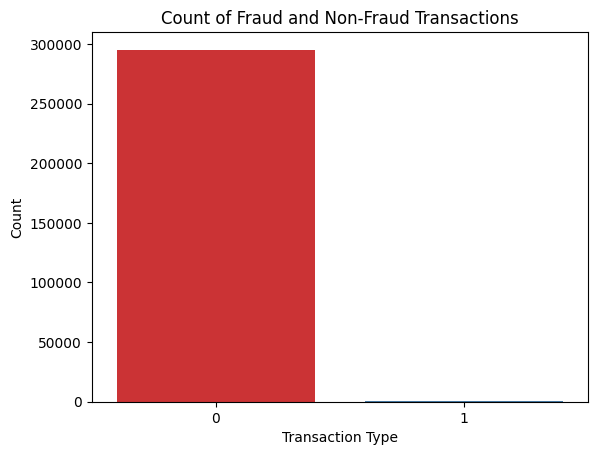

In [41]:
sns.countplot(x='Is Fraud?', data=transactions, palette='Set1')
plt.title('Count of Fraud and Non-Fraud Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# Data Preprocessing

These are the basic preprocessing steps that turn all the features into numericals. Additionally there is some feature engineering that can support the process based on the Data exploration. Feature selection also supports the models performance.

### Feature Selection

Version 1 list were the features that were fit into the models in the first stage of the experiment. <br>
We can see clearly some of them are redundant, for example having Hour and Minute columns, and also a column for Total Minutes, both representing the hour of the transaction. In real-life data science problems, it's almost rare that all the variables in the dataset are useful for building a model. Adding redundant variables reduces the model's generalization capability and may also reduce the overall accuracy of a classifier. [Feature Selection Techniques](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/#:~:text=In%20real%2Dlife%20data%20science,overall%20accuracy%20of%20a%20classifier.)

_Version 1_
- __User__ - Unique customer number<br>
- __Card__ - Card number, max 9 cards per user <br>
- __Year__ - Year of transaction <br>
- __Month__ - Month of transaction <br>
- __Day__ - Day of transaction <br>
- __Amount__ - Amount of transaction in $ <br>
- __Use Chip__ - Type of payment <br>
- __Merchant Name__ - Name of Merchant <br>
- __Merchant City__ - City of Merchant <br>
- __Merchant State__ - State of Merchant <br>
- __MCC__ - Merchant Category Code (MCC) is a four-digit number listed in ISO 18245 for retail financial services. An MCC is used to classify a business by the types of goods or services it provides.<br>
- __Errors?__ - Errors that occured during transaction <br>
- __Is Fraud?__ - Is the transaction fraud: Yes or No <br>
- __Category__ - Mapping MCC (merchant code) that can have 9999 unique values to way less categories as there is correlation between most <br>
- __TimeInMinutes__ - Hour of transaction represented as total minutes <br>
- __Hour and Minute__ - Separated Hour <br>
- __LAT and LNG__ - Representing the Zip of Merchant <br>
- __AvgDailyTransactionsPerCard, AvgDailyTransactions__ - feature engineering these columns for support, we could make columns related to only the Fraud transactions but that could leak data into the validation and test sets.
- __Ordinal date__ - Ordinal representation of the date

_Version 2_ - the columns we'll drop
- __Merchant City__ - City of Merchant can be detected by the LAT and LNG columns, it also scored low on Feature Importance Gain and Split <br> 
- __MCC__ - Merchant Category Code can be detected broadly by the Category column designed based on the MCC <br>
- __Minute__ - Redundant with TimeInMinutes column, we will keep the __Hour__ column because we saw that it does play some role during Data Exploration stage <br>

### Categorical encoding methods

We have quite a lot of unique categoricals in this dataset like Cities, Countries, States, Merchant Names, Merchant Categories(MCC) etc. Depending on the models we'll use we need to encode them in different manners.

This [research paper](https://arxiv.org/pdf/2112.12024.pdf) reviews a vast amount of methods, and provides extensive information about compatibility of each method with algorithms.

### Our models
The models we experiment with in this project are:
 - __LightGBM__ -  the reason is LGBM has a builtin method to process categorical features. The method behind the model is explained [here](https://lightgbm.readthedocs.io/en/latest/Features.html#optimal-split-for-categorical-features). You don't need to use OneHotEncoding, or any other type of encoding, you will only have to set the data type to categorical.
 - __LogisticRegression__ - A classic model that is also used in fraud detection.
 - __RandomForest__ - Numerous comparative studies have proven RF’s effectiveness in fraud detection relative to machine learning solutions and other models. The results of [this research](https://www.mdpi.com/2076-3417/13/9/5758) show that an RF-based model outperforms a support vector, machine learning algorithms, and even a neural network in terms of AP, AUC, and PrecisonRank metrics (all of the models made predictions on an actual transaction data from a Belgian payment provider).

__Preprocessing pipelines__

In [5]:
def time_processing(df):
    df['TimeInMinutes'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour * 60 + pd.to_datetime(df['Time'], format='%H:%M').dt.minute
    df[['Hour', 'Minute']] = df['Time'].str.split(':', expand=True)
    df[['Hour', 'Minute']] = df[['Hour', 'Minute']].apply(pd.to_numeric)
    df = df.drop('Time', axis=1)
    return df

def amount_object_to_numeric(df):
    df['Amount'] = df['Amount'].apply(lambda value: value.split("$")[1])
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
    return df

def mcc_to_category(df):
    mcc_mapping = {
        (1, 1499): 'agricultural',
        (1500, 2999): 'contracted',
        (3000, 3999): 'travel',
        (4000, 4799): 'transportation',
        (4800, 4999): 'utility',
        (5000, 5599): 'retail outlet',
        (5600, 5699): 'clothing',
        (5700, 7299): 'misc',
        (7300, 7999): 'business',
        (8000, 8999): 'professional',
        (9000, 9999): 'government'
    }

    def mcc_cat(value):
        for range_, replacement in mcc_mapping.items():
            if isinstance(range_, tuple) and range_[0] <= value <= range_[1]:
                return replacement
        return value

    df['Category'] = df['MCC'].apply(mcc_cat)
    df['Category'] = df['Category'].astype("category")
    return df

def ttype_error_dummies(df):
    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input must be a Pandas DataFrame.")
    
    errors_dummies = df['Errors?'].str.get_dummies(',').add_prefix('Error_')
    use_chip_dummies = pd.get_dummies(df['Use Chip'], prefix='Transaction_Type').astype(int)
    
    df = pd.concat([df, use_chip_dummies, errors_dummies], axis=1)
    df = df.drop(columns=['Use Chip', 'Errors?'])
    return df

def fraud_numeric(df):
    df['Is Fraud?'] = df['Is Fraud?'].replace({'No': 0, 'Yes': 1})
    return df


def zip_to_latlng(df):
    usa_zips = pd.read_csv("https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data", delimiter=',')
    usa_zips.rename(columns={'ZIP': 'Zip'}, inplace=True)
    df = pd.merge(df, usa_zips, on='Zip', how='left')
    columns_to_fill = ['Zip','LAT','LNG']
    fill_nans = {'Zip': 13440.0, 'LAT': 43.215771, 'LNG': -75.461779} #Replacing Nan's with one of the least frequent Zip codes in the dataset
    df[columns_to_fill] = df[columns_to_fill].fillna(value=fill_nans)
    df = df.drop('Zip', axis=1)
    return df

def pre_feature_engineering(df):
    #Creating temporary Date column for the purpose
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
    
    #Average Daily Transactions Count per User
    transactions_per_day = df.groupby(['User', 'Date']).size().reset_index(name='TransactionCount')
    avg_daily_transactions = transactions_per_day.groupby('User')['TransactionCount'].mean().reset_index(name='AvgDailyTransactions')
    df = pd.merge(df, avg_daily_transactions, on='User', how='left')
    
    #Average Daily Transactions Count per Card
    transactions_per_card = df.groupby(['User', 'Card', 'Date']).size().reset_index(name='TransactionCount')
    avg_daily_transactions_per_card = transactions_per_card.groupby(['User', 'Card'])['TransactionCount'].mean().reset_index(name='AvgDailyTransactionsPerCard')
    df = pd.merge(df, avg_daily_transactions_per_card, on=['User', 'Card'], how='left')

    #Removing these as they will cause data leakage into the test dataset
    
    # Average Transaction Amount excl. fraud transactions
    #avg_transaction_amount = df[df['Is Fraud?'] != 1].groupby('User')['Amount'].mean().round(2).reset_index(name='AvgTransactionAmount')
    #df = pd.merge(df, avg_transaction_amount, on=['User'], how='left')

    # Average Daily Transaction Amount per User excl. fraud transactions
    #daily_transactions = df[df['Is Fraud?'] != 1].groupby(['User', 'Date'])['Amount'].mean().round(2).reset_index(name='DailyTransactionAmount')
    #avg_daily_transaction_per_user = daily_transactions.groupby('User')['DailyTransactionAmount'].mean().reset_index(name='AvgDailyTransactionAmount')
    #df = pd.merge(df, avg_daily_transaction_per_user, on='User', how='left')
    
    #Drop the Date column
    df = df.drop('Date', axis=1)
    return df

def rank_date(df):
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
    df.sort_values(by=['User', 'Card', 'Date'], inplace=True)
    df['Ordinal date'] = df.groupby(['User', 'Card'])['Date'].rank(method='dense').astype(int)
    df = df.drop('Date', axis=1)
    
    return df

def drop_columns(df):
    columns_to_drop = ['Merchant City', 'MCC', 'Minute']
    df.drop(columns=columns_to_drop, errors='ignore', inplace=True)
    return df

def drop_columns_wfraud(df):
    columns_to_drop = ['Merchant City', 'MCC', 'Minute', 'Is Fraud?']
    df.drop(columns=columns_to_drop, errors='ignore', inplace=True)
    return df

In [6]:
# We use this pipeline before the train/test split for all models, except LGBM and Logistic Regression without PCA
preprocessing_whole_dataset = Pipeline([
    ('amount_processing', FunctionTransformer(amount_object_to_numeric, validate=False)), # turns amount into numerical
    ('fraud_numeric', FunctionTransformer(fraud_numeric, validate=False)), # turns fraud indicator into numerical
    ('mcc_to_category', FunctionTransformer(mcc_to_category, validate=False)), # merchant codes to less categories
    ('time_processing', FunctionTransformer(time_processing, validate=False)), # creates TimeInMinutes and hour column
    ('zip_to_latlng', FunctionTransformer(zip_to_latlng, validate=False)), # zip code to latitude and longtitude columns
] 
)


# OneHotEncoder pipeline
columns_to_encode_v2 = ['Use Chip', 'Merchant City', 'Merchant State', 'Errors?', 'Category']
columns_to_encode_v1 = ['Merchant State', 'Category']
numerical_columns = ['User', 'Card', 'Year', 'Month', 'Day', 'Amount',
       'Merchant Name', 'MCC',
       'Is Fraud?', 'TimeInMinutes', 'Hour', 'Minute', 'LAT',
       'LNG', 'AvgDailyTransactions', 'AvgDailyTransactionsPerCard']

string_encoding = ColumnTransformer(
    transformers=[
        ('onehot', Pipeline([
            ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
        ]), columns_to_encode_v1)
    ],
    remainder='passthrough'  # This includes any columns not specified in the transformers
)

preprocessing_whole_dataset_lr = Pipeline([
    ('amount_processing', FunctionTransformer(amount_object_to_numeric, validate=False)), # turns amount into numerical
    ('fraud_numeric', FunctionTransformer(fraud_numeric, validate=False)), # turns fraud indicator into numerical
    ('mcc_to_category', FunctionTransformer(mcc_to_category, validate=False)), # merchant codes to less categories
    ('time_processing', FunctionTransformer(time_processing, validate=False)), # creates TimeInMinutes and hour column
    ('zip_to_latlng', FunctionTransformer(zip_to_latlng, validate=False)), # zip code to latitude and longtitude columns
    ('drop_columns', FunctionTransformer(drop_columns_wfraud, validate=False)), #Drops 'Merchant City', 'MCC', 'Minute', 'Is Fraud?' columns
    ('ttype_error_dummies', FunctionTransformer(ttype_error_dummies, validate=False)), #Transaction types(Use chip), and Errors? encoding
    ('string_encoding', string_encoding)
        ] 
)


# The pipeline for LGBM split dataset, because we don't need to use OneHotEncoder for it
preprocessing_split_lgbm = Pipeline([
    ('pre_feature_engineering', FunctionTransformer(pre_feature_engineering, validate=False)),
    ('rank_date', FunctionTransformer(rank_date, validate=False))
        ] 
)


# This pipeline is used when you want to transform the categoricals with OneHotEncoding
preprocessing_split_encoding = Pipeline([
    ('pre_feature_engineering', FunctionTransformer(pre_feature_engineering, validate=False)), #Adds new features
    ('rank_date', FunctionTransformer(rank_date, validate=False)), #Ordinal representation of the data
    ('drop_columns', FunctionTransformer(drop_columns, validate=False)), #Drops 'Merchant City', 'MCC', 'Minute' columns
    #('ttype_error_dummies', FunctionTransformer(ttype_error_dummies, validate=False)), #Transaction types, and Errors? encoding
    ('string_encoding', string_encoding)
        ] 
)

# LightGBM

In [8]:
tf_transactions = preprocessing_whole_dataset.fit_transform(transactions)

print(tf_transactions)

        User  Card  Year  Month  Day  Amount        Merchant Name  \
0          0     0  2002      9    1  134.09  3527213246127876953   
1          0     0  2002      9    1   38.48  -727612092139916043   
2          0     0  2002      9    2  120.34  -727612092139916043   
3          0     0  2002      9    2  128.95  3414527459579106770   
4          0     0  2002      9    3  104.71  5817218446178736267   
...      ...   ...   ...    ...  ...     ...                  ...   
295443    19     4  2020      2   27   85.11  2027553650310142703   
295444    19     4  2020      2   27   60.00 -4282466774399734331   
295445    19     4  2020      2   27   26.82  5527561919199217821   
295446    19     4  2020      2   28   90.18  4722913068560264812   
295447    19     4  2020      2   28   80.00 -4282466774399734331   

        Merchant City Merchant State   MCC  ...  \
0            La Verne             CA  5300  ...   
1       Monterey Park             CA  5411  ...   
2       Monterey P

In [9]:
tf_transactions.columns

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Amount', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'MCC', 'Errors?',
       'Is Fraud?', 'Category', 'TimeInMinutes', 'Hour', 'Minute', 'LAT',
       'LNG'],
      dtype='object')

In [12]:
X = tf_transactions.drop('Is Fraud?', axis=1)
y = tf_transactions['Is Fraud?']

# Create a train-test split (60-40)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Further split the temporary set into validation and test sets (40-60 of the remaining data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, stratify=y_temp, random_state=42)

# Display the sizes of the sets
print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Train set size: 177268
Validation set size: 47272
Test set size: 70908


In [10]:
X_train_tf = preprocessing_split_lgbm.fit_transform(X_train)

In [11]:
X_val_tf = preprocessing_split_lgbm.transform(X_val)

In [12]:
# The categorical features need to be dtypes categorical in order for the builtin feature to recognize them
categorical_features = ['Use Chip', 'Merchant Name', 'Merchant City', 'Merchant State', 'MCC', 'Errors?', 'Category']  # List of categorical columns
X_train_tf[categorical_features] = X_train_tf[categorical_features].astype('category')
X_val_tf[categorical_features] = X_val_tf[categorical_features].astype('category')

In [13]:
X_val_tf.dtypes

User                              int64
Card                              int64
Year                              int64
Month                             int64
Day                               int64
Amount                          float64
Use Chip                       category
Merchant Name                  category
Merchant City                  category
Merchant State                 category
MCC                            category
Errors?                        category
Category                       category
TimeInMinutes                     int32
Hour                              int64
Minute                            int64
LAT                             float64
LNG                             float64
AvgDailyTransactions            float64
AvgDailyTransactionsPerCard     float64
Ordinal date                      int64
dtype: object

In [14]:
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'is_unbalance': True,
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05
}

train_data = lgb.Dataset(X_train_tf, label=y_train, categorical_feature=categorical_features)

# Train the LightGBM model
model_lgb = lgb.train(params, train_data, num_boost_round=100)

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 181, number of negative: 177087
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3940
[LightGBM] [Info] Number of data points in the train set: 177268, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001021 -> initscore=-6.885899
[LightGBM] [Info] Start training from score -6.885899


### Evaluation metrics, Performance metric

__Confusion matrix/Classification report__ provides the exact number of Predicted Negative/Positive, and Actual Negative/Positive classes.
|                 | Predicted Negative | Predicted Positive |
|-----------------|--------------------|--------------------|
| Actual Negative | True Negative (TN) | False Positive (FP)|
| Actual Positive | False Negative (FN)| True Positive (TP) |

Based on them we calculate the precision, recall, f1, and accuracy scores, as broken down below. Depending on the classification problem we're dealing with, and the data available, different scores would be relevant. <br> 
 
 - __Accuracy__ - Accuracy is the ratio of correctly predicted observations to the total observations. It provides an overall measure of how well the model is performing. [accuracy = np.sum([TP, TN]) / np.sum([TP, TN, FP, FN])]<br>
 - __Precision__ - Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of how many of the predicted positive instances are actually positive. [precision = TP / np.sum([TP, FP])]<br>
 - __Recall__ - Recall is the ratio of correctly predicted positive observations to the total actual positives. It is a measure of how many actual positive instances were captured by the model. [recall = TP / np.sum([TP, FN])]<br>
 - __F1 or beta__ - the F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, this is the default F-score. We can use F-beta and emphasize either precision or recall more, depending on the value of the beta parameter [f1_score = 2 * (precision * recall) / (precision + recall)][f_beta = (1 + beta** 2) * (precision * recall) / ((beta** 2 * precision) + recall)]
 
The __Precision-Recall Curve__ is a graphical representation used to assess the performance of a classification model, particularly in binary classification problems. It is especially useful when dealing with imbalanced datasets where one class is much more prevalent than the other.
 - The curve is created by varying the classification threshold of the model and plotting precision against recall for each threshold.
 - Each point on the curve represents a trade-off between precision and recall at a specific threshold.
 - The area under the Precision-Recall Curve (AUC-PR) summarizes the model's overall performance across different thresholds.

__Receiver Operating Characteristic (ROC) Curve__ <br>
In imbalanced datasets, where one class is much more prevalent than the other, accuracy alone can be a misleading metric. ROC curves allow you to visualize and understand the trade-off between correctly identifying positive instances (sensitivity) and avoiding false positives (specificity) at different decision thresholds.
Score is between 0 and 1, e.g. AUC score 0.5 corresponds to a model that predicts classes randomly, and 1.0 corresponds to a perfect classifier.

__Feature Importances__ <br>
_Feature Importance Split and Gain concepts are Decision tree, and gradient boosting algorithm specific!_

 - Feature Importance Split: Indicates how often a feature is used for splitting across all trees. 
 - Feature Imporatnce Gain: Measures the improvement in model performance resulting from splits based on a particular feature.<br>
Features with high split values are frequently used for decision-making, while features with high gain values contribute more to the model's accuracy improvement.

[Here](https://www.aporia.com/learn/feature-importance/feature-importance-7-methods-and-a-quick-tutorial/) you can read a summary of Feature Importance methods across models which will help with feature selection, and increasing model interpretability.


__Performance metric__ <br>

Our dataset is imbalanced, because the fraudulent transactions are way less than the regular ones, the ratio is 99.9% regular transactions to 0.1% fraud ones. If the models predicted quite well the regular class, let's say 95% but couldn't recognize the fraud class, we would get a very high accuracy score, but this doesn't mean our model is good, because predicting the negative class(regular transactions) wasn't our main goal. <br>
In the case of fraud detection in bank transactions we aim to predict both classes well, but as fraud ones are harder to detect due to the imbalance we should focus more on evaluation methods like Precision, Recall or F1. We will aim for __F1 score = 0.99__ in this project.


### LightGBM Results

In [46]:
def predict_lightgbm(model, X_train, y_train):
    y_pred_proba = model.predict(X_train)
    y_pred = (y_pred_proba >= 0.98).astype(int)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_train, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Classification Report
    class_report = classification_report(y_train, y_pred)
    print("\nClassification Report:")
    print(class_report)
    
    y_train_pred_proba = model.predict(X_train)

    # Calculate precision-recall pairs
    precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_pred_proba)

    # Calculate average precision score for training data
    average_precision_train = average_precision_score(y_train, y_train_pred_proba)

    # Plot precision-recall curve for training data
    plt.figure(figsize=(8, 6))
    plt.plot(recall_train, precision_train, marker='.', color='b', label=f'Average Precision = {average_precision_train:.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (Training data)')
    plt.legend(loc='lower left')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.show()

In [54]:
def predict_lightgbm_val(model, X_val, y_val):
    y_val_pred_proba = model.predict(X_val)
    y_val_pred = (y_val_pred_proba >= 0.98).astype(int)

    # Confusion Matrix
    conf_matrix_val = confusion_matrix(y_val, y_val_pred)
    print("Validation Set Confusion Matrix:")
    print(conf_matrix_val)

    # Classification Report
    class_report_val = classification_report(y_val, y_val_pred)
    print("\nValidation Set Classification Report:")
    print(class_report_val)

    # Calculate precision-recall pairs for validation set
    precision_val, recall_val, _ = precision_recall_curve(y_val, y_val_pred_proba)

    # Calculate average precision score for validation set
    average_precision_val = average_precision_score(y_val, y_val_pred_proba)

    # Plot precision-recall curve for validation set
    plt.figure(figsize=(8, 6))
    plt.plot(recall_val, precision_val, marker='.', color='b', label=f'Average Precision = {average_precision_val:.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (Validation data)')
    plt.legend(loc='lower left')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.show()

Confusion Matrix:
[[122825  54262]
 [    63    118]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.69      0.82    177087
           1       0.00      0.65      0.00       181

    accuracy                           0.69    177268
   macro avg       0.50      0.67      0.41    177268
weighted avg       1.00      0.69      0.82    177268



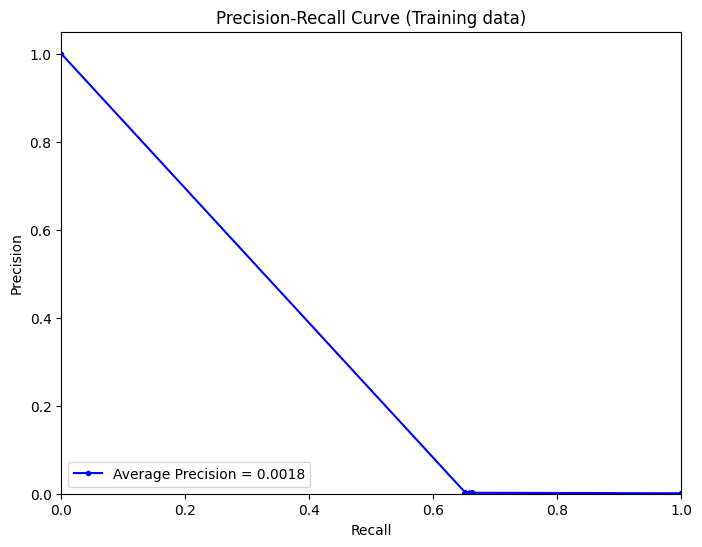

In [47]:
predict_lightgbm(model_lgb, X_train_tf, y_train)

Validation Set Confusion Matrix:
[[17172 30052]
 [   20    28]]

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.36      0.53     47224
           1       0.00      0.58      0.00        48

    accuracy                           0.36     47272
   macro avg       0.50      0.47      0.27     47272
weighted avg       1.00      0.36      0.53     47272



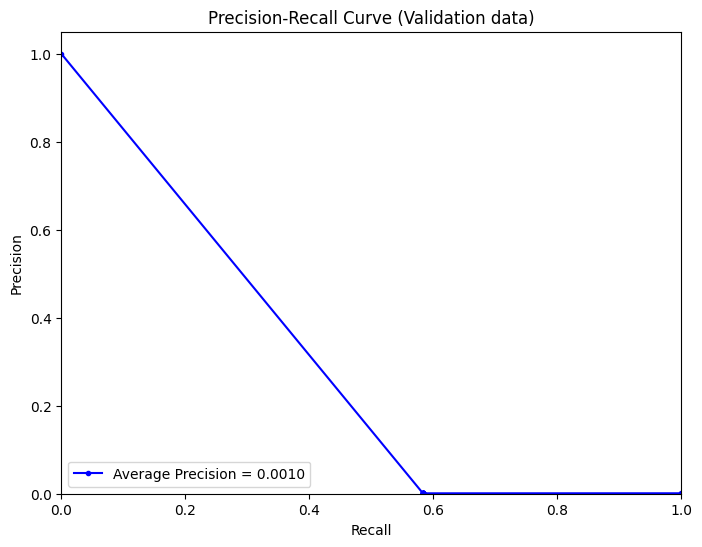

In [55]:
predict_lightgbm_val(model_lgb, X_val_tf, y_val)

In [53]:
X_val_tf.dtypes

User                              int64
Card                              int64
Year                              int64
Month                             int64
Day                               int64
Amount                          float64
Use Chip                       category
Merchant Name                  category
Merchant City                  category
Merchant State                 category
MCC                            category
Errors?                        category
Category                       category
TimeInMinutes                     int32
Hour                              int64
Minute                            int64
LAT                             float64
LNG                             float64
AvgDailyTransactions            float64
AvgDailyTransactionsPerCard     float64
Ordinal date                      int64
dtype: object

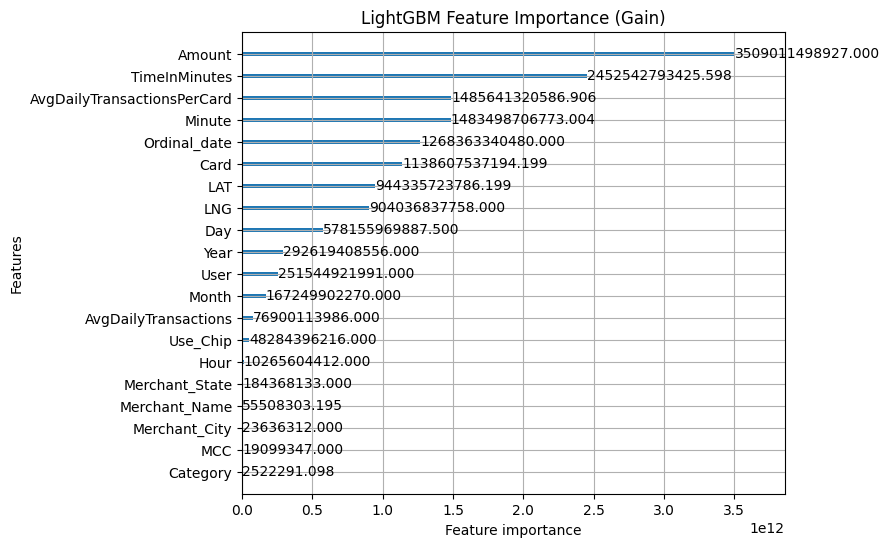

<Figure size 640x480 with 0 Axes>

In [50]:
lgb.plot_importance(model_lgb, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain)")
plt.show()

plt.savefig("feature_importance_gain.png")

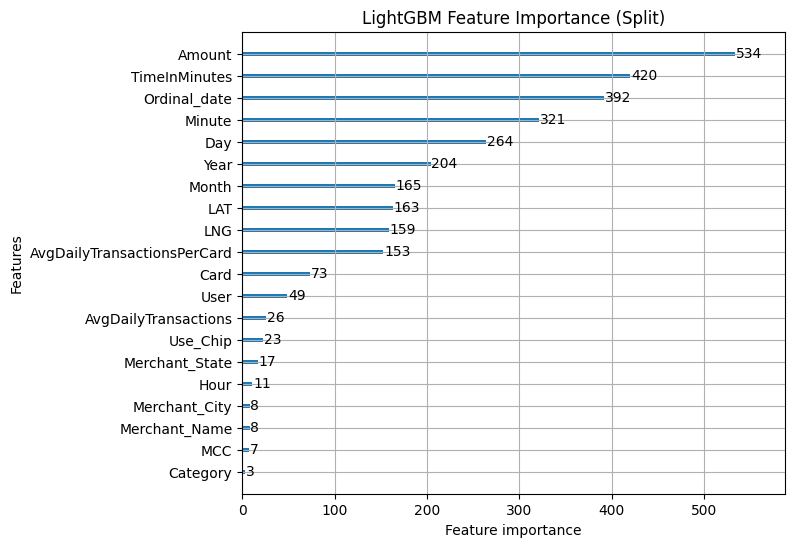

In [52]:
lgb.plot_importance(model_lgb, importance_type="split", figsize=(7,6), title="LightGBM Feature Importance (Split)")
plt.show()

## Logistic Regression

Sharing only results from experiment without PCA, as those were too low:

| Methods | Training(F1) | Validation(F1) |
|----------|----------|----------|
| MinMaxScaler  | - | 0.19  |
| MinMaxScaler, SMOTE  | 0.93   | 0.03   |
| PolynomialFeatures, MinMaxScaler| - |  0.75 |
| PolynomialFeatures, MinMaxScaler, SMOTE  | 0.99 |   0.54 |
| StandardScaler, SMOTE | 0.93 |   0.35 |

There's a tendency of model's scoring on the validation set to be significantly lower than the training set predictions. This means the model has overfit on the training data, it has learned it too well, and has high variance, so it can't generalize well on new data.

In [7]:
tf_transactions = preprocessing_whole_dataset_lr.fit_transform(transactions)

print(tf_transactions)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
tf_transactions.shape

(295448, 129)

In [8]:
#We use our original dataframe to extract the target, because we had to remove the target 'Is Fraud?' column during the preprocessing stage as our dataframe converted into a numpy array and it would've been an issue finding the target column in that form

X = tf_transactions
y = transactions['Is Fraud?'].values 

# Create a train-test split (60-40)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Further split the temporary set into validation and test sets (40-60 of the remaining data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, stratify=y_temp, random_state=42)

# Display the sizes of the sets
print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Train set size: 177268
Validation set size: 47272
Test set size: 70908


In [9]:
scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)
X_val_mm = scaler.transform(X_val)
X_test_mm = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr_model = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create the grid search
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train_mm, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best F1 score: {:.2f}".format(grid_search.best_score_))

best_model_lr = grid_search.best_estimator_

Best hyperparameters:  {'C': 10, 'penalty': 'l2'}
Best F1 score: 0.19


In [11]:
# Oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Fit and transform the training data
X_resampled, y_resampled = smote.fit_resample(X_train_mm, y_train)

In [19]:
lr_model = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create the grid search
grid_search_resampled = GridSearchCV(lr_model, param_grid, cv=5, scoring='f1')

# Fit the grid search to the data
grid_search_resampled.fit(X_resampled, y_resampled)

# Print the best hyperparameters and corresponding accuracy
print("Best hyperparameters: ", grid_search_resampled.best_params_)
print("Best F1 score: {:.2f}".format(grid_search_resampled.best_score_))

best_model_lr = grid_search_resampled.best_estimator_

Best hyperparameters:  {'C': 100, 'penalty': 'l2'}
Best F1 score: 0.93


In [23]:
# Calculate F1 score on the validation set
val_f1 = best_model_lr.score(X_val_mm, y_val)
print("Validation F1 score: {:.2f}".format(val_f1))

Validation F1 score: 0.94


In [21]:
y_val_pred = best_model_lr.predict(X_val_mm)

# Calculate F1 score on the validation set
val_f1 = f1_score(y_val, y_val_pred)
print("Validation F1 score: {:.2f}".format(val_f1))

Validation F1 score: 0.03


In [12]:
#Polynomial features on resampled dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

# Transform the original features to polynomial features
X_train_poly = poly.fit_transform(X_resampled)
X_val_poly = poly.transform(X_val_mm)
X_test_poly = poly.transform(X_test_mm)

# Train our best model
lr_model = LogisticRegression(C=100, penalty='l2')
lr_model.fit(X_train_poly, y_resampled)

# Make predictions on the test set with polynomial features
y_pred = lr_model.predict(X_val_poly)

# Evaluate the model on validation set
print("Classification Report:\n", classification_report(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     47224
           1       0.04      0.71      0.08        48

    accuracy                           0.98     47272
   macro avg       0.52      0.85      0.54     47272
weighted avg       1.00      0.98      0.99     47272



In [14]:
y_pred2 = lr_model.predict(X_train_poly)

# Evaluate the model
print("Training Classification Report:\n", classification_report(y_resampled, y_pred2))

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    177087
           1       0.98      1.00      0.99    177087

    accuracy                           0.99    354174
   macro avg       0.99      0.99      0.99    354174
weighted avg       0.99      0.99      0.99    354174



In [31]:
#Polynomial feature results on non-resampled training dataset
y_pred = lr_model.predict(X_val_poly)

# Evaluate the model
print("Classification Report:\n", classification_report(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     47224
           1       0.85      0.35      0.50        48

    accuracy                           1.00     47272
   macro avg       0.92      0.68      0.75     47272
weighted avg       1.00      1.00      1.00     47272



In [13]:
lr_model_best = LogisticRegression(C=100, penalty='l2')
lr_model_best.fit(X_resampled, y_resampled)

LogisticRegression(C=100)

In [27]:
def predict_lr_train(model, X_train, y_train):
    y_train_pred = model.predict(X_train)
    print("Confusion Matrix")
    print(confusion_matrix(y_train, y_train_pred))
    print("Classification Report")
    print(classification_report(y_train, y_train_pred))
    print('--'*30)
    # Plot precision-recall curve
    y_train_pred_prob = model.predict_proba(X_train)[:, 1]

    # Compute precision-recall pairs for different probability threshold
    precision, recall, _ = precision_recall_curve(y_train, y_train_pred_prob)

    # Plot precision-recall curve
    plt.figure(figsize=(12, 6))
    plt.plot(recall, precision, c='b')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    pr_score = average_precision_score(y_train, y_train_pred_prob)
    plt.title('Train PR curve: \n Average Precision-Recall Score = {0:0.2f}'.format(pr_score, fontsize=14))
    plt.grid(which='both', linestyle='-', color='g', linewidth=0.2)
    plt.show()
    
    #Plot ROC curve
    from sklearn.metrics import roc_curve, auc

    y_pred_proba = model.predict_proba(X_train)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Train Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [24]:
def predict_lr_val(model, X_train, y_train):
    y_train_pred = model.predict(X_train)
    print("Confusion Matrix")
    print(confusion_matrix(y_train, y_train_pred))
    print("Classification Report")
    print(classification_report(y_train, y_train_pred))
    print('--'*30)
    # Plot precision-recall curve
    y_train_pred_prob = model.predict_proba(X_train)[:, 1]

    # Compute precision-recall pairs for different probability threshold
    precision, recall, _ = precision_recall_curve(y_train, y_train_pred_prob)

    # Plot precision-recall curve
    plt.figure(figsize=(12, 6))
    plt.plot(recall, precision, c='b')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    pr_score = average_precision_score(y_train, y_train_pred_prob)
    plt.title('Validation PR curve: \n Average Precision-Recall Score = {0:0.2f}'.format(pr_score, fontsize=14))
    plt.grid(which='both', linestyle='-', color='g', linewidth=0.2)
    plt.show()
    
    #Plot ROC curve
    from sklearn.metrics import roc_curve, auc

    y_pred_proba = model.predict_proba(X_train)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Validation Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

Confusion Matrix
[[166850  10237]
 [ 14118 162969]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93    177087
           1       0.94      0.92      0.93    177087

    accuracy                           0.93    354174
   macro avg       0.93      0.93      0.93    354174
weighted avg       0.93      0.93      0.93    354174

------------------------------------------------------------


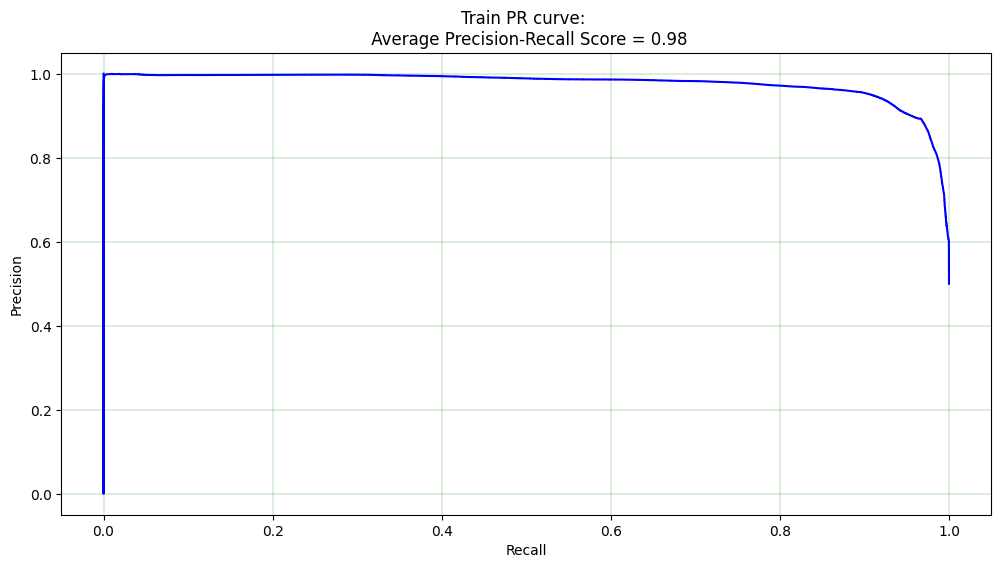

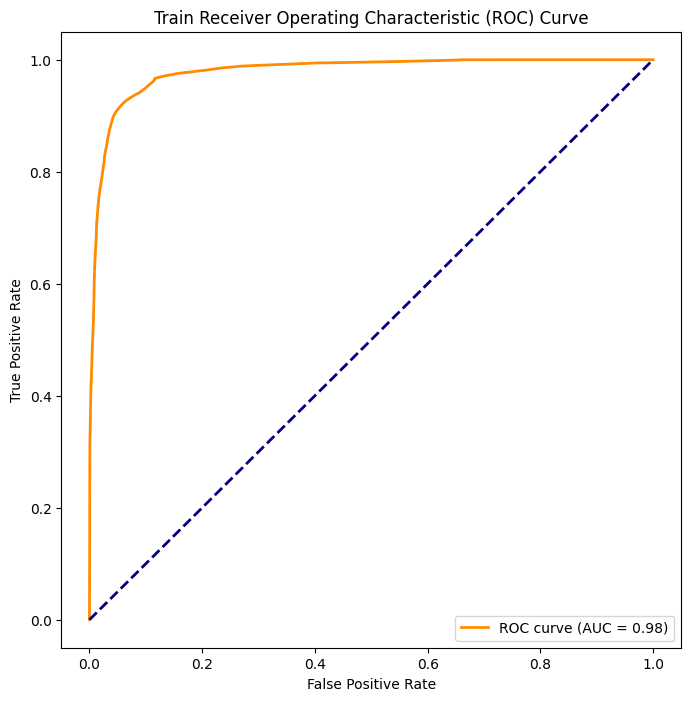

In [16]:
predict_lr_train(lr_model_best, X_resampled, y_resampled)

Confusion Matrix
[[44600  2624]
 [    6    42]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     47224
           1       0.02      0.88      0.03        48

    accuracy                           0.94     47272
   macro avg       0.51      0.91      0.50     47272
weighted avg       1.00      0.94      0.97     47272

------------------------------------------------------------


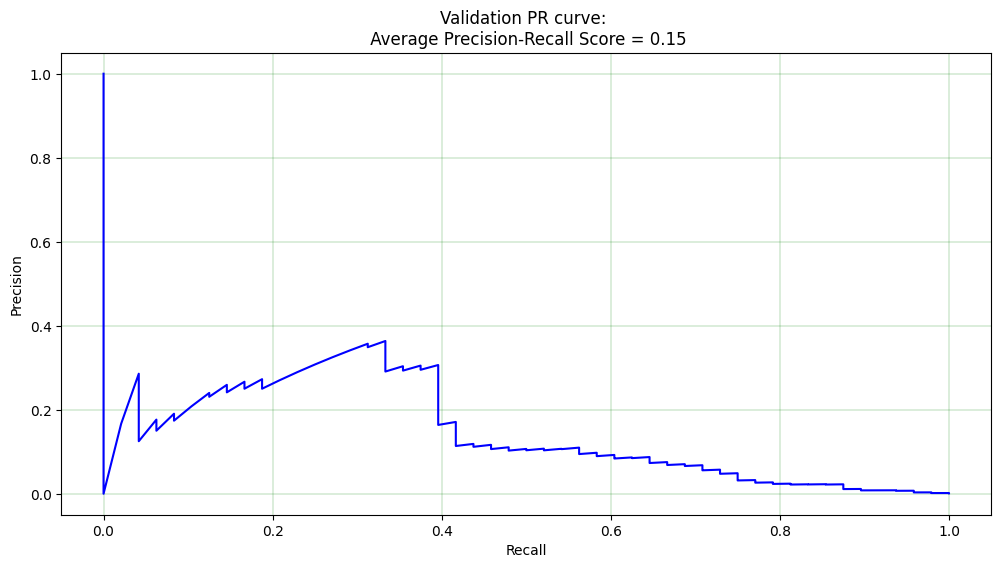

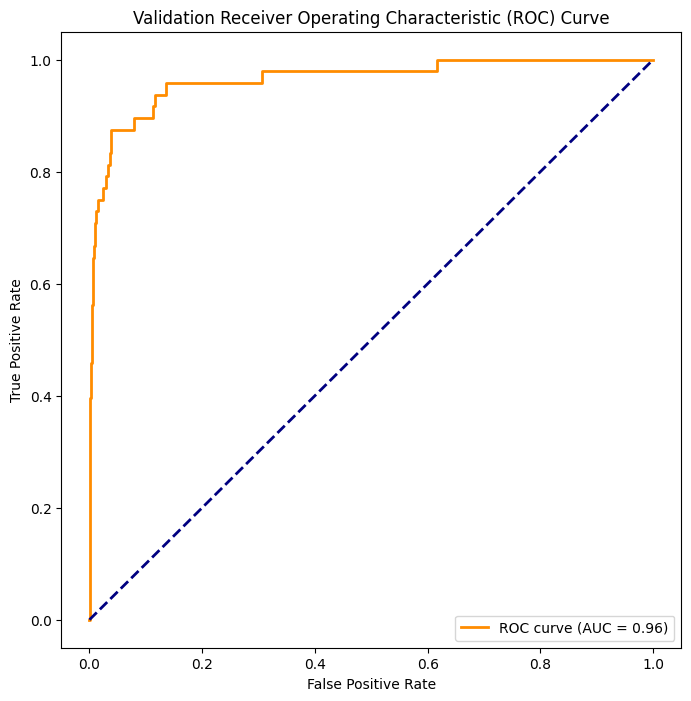

In [17]:
predict_lr_val(lr_model_best, X_val_mm, y_val)

In [15]:
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
X_val_ss = scaler.transform(X_val)
X_test_ss = scaler.transform(X_test)

In [16]:
# Oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Fit and transform the training data
X_ss_resampled, y_ss_resampled = smote.fit_resample(X_train_ss, y_train)

In [17]:
lr_model_ss1 = LogisticRegression(C=100, penalty='l2')
lr_model_ss1.fit(X_resampled, y_resampled)

LogisticRegression(C=100)

Confusion Matrix
[[166850  10237]
 [ 14118 162969]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93    177087
           1       0.94      0.92      0.93    177087

    accuracy                           0.93    354174
   macro avg       0.93      0.93      0.93    354174
weighted avg       0.93      0.93      0.93    354174

------------------------------------------------------------


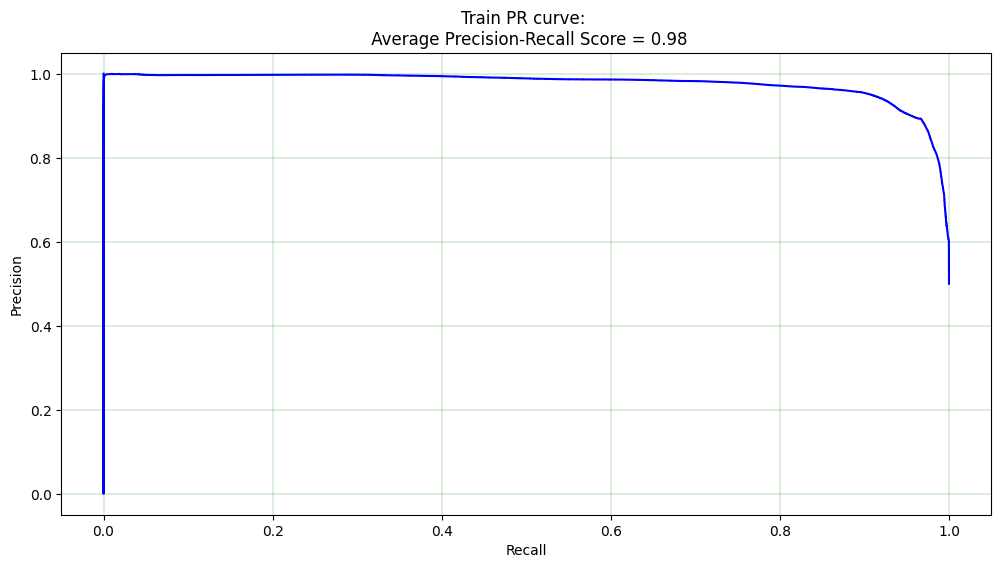

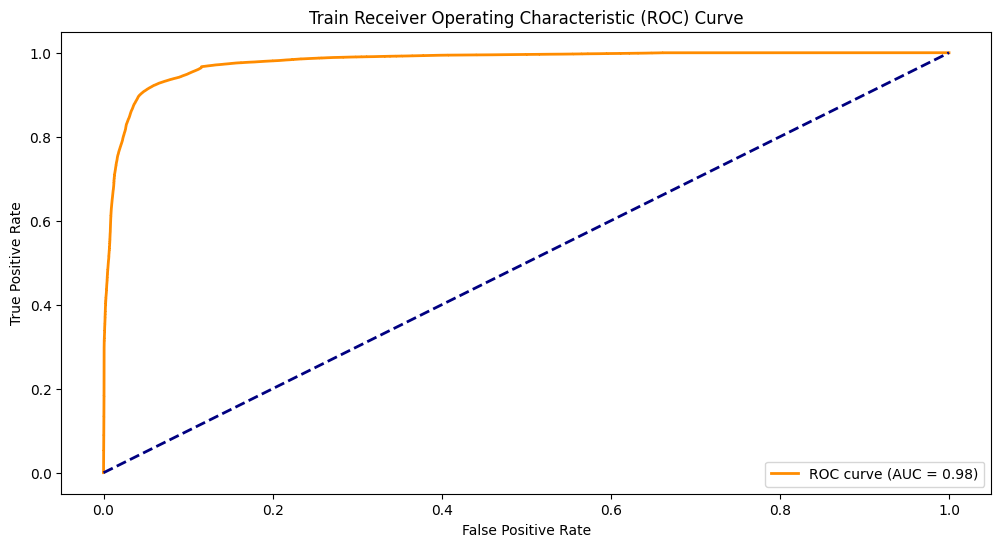

In [28]:
predict_lr_train(lr_model_ss1, X_resampled, y_resampled)

Confusion Matrix
[[25088 22136]
 [    2    46]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.53      0.69     47224
           1       0.00      0.96      0.00        48

    accuracy                           0.53     47272
   macro avg       0.50      0.74      0.35     47272
weighted avg       1.00      0.53      0.69     47272

------------------------------------------------------------


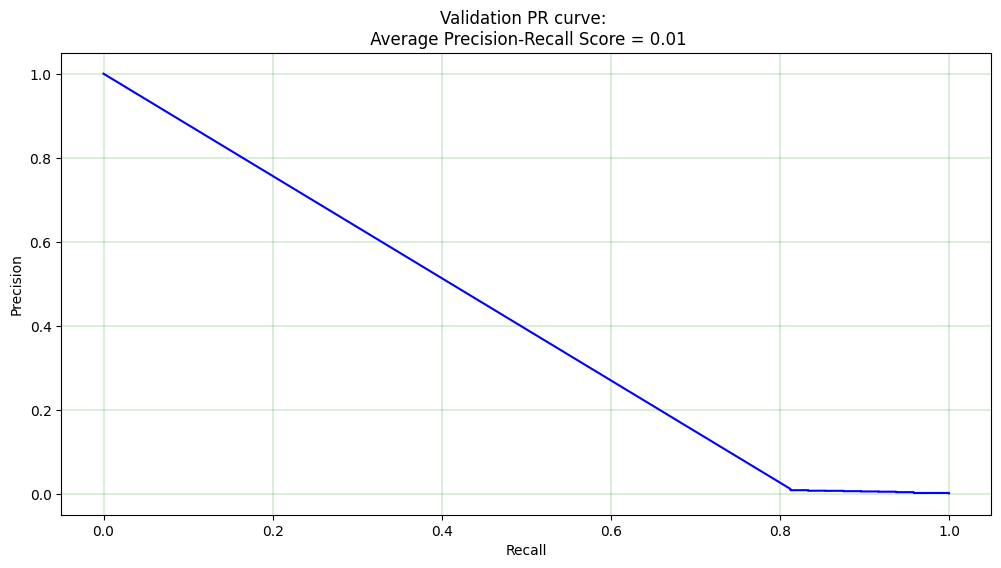

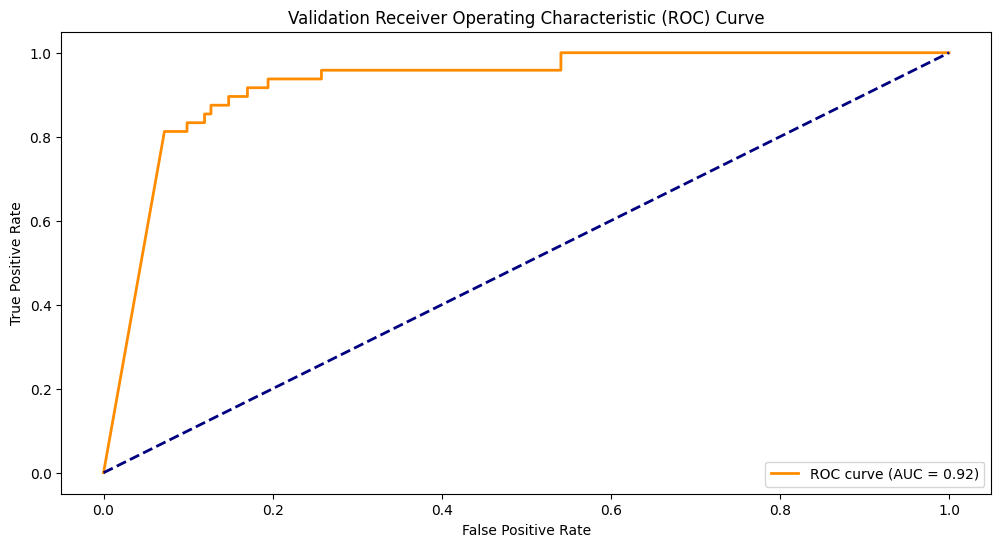

In [25]:
predict_lr_val(lr_model_ss1, X_val_ss, y_val)

## Logistic Regression with PCA

Our second model is Logistic Regression, we'll test it by applying PCA, we have over 2000 features after transforming with OneHotEncoder the categoricals.

In [8]:
tf_transactions = preprocessing_whole_dataset.fit_transform(transactions)

print(tf_transactions)

        User  Card  Year  Month  Day  Amount        Merchant Name  \
0          0     0  2002      9    1  134.09  3527213246127876953   
1          0     0  2002      9    1   38.48  -727612092139916043   
2          0     0  2002      9    2  120.34  -727612092139916043   
3          0     0  2002      9    2  128.95  3414527459579106770   
4          0     0  2002      9    3  104.71  5817218446178736267   
...      ...   ...   ...    ...  ...     ...                  ...   
295443    19     4  2020      2   27   85.11  2027553650310142703   
295444    19     4  2020      2   27   60.00 -4282466774399734331   
295445    19     4  2020      2   27   26.82  5527561919199217821   
295446    19     4  2020      2   28   90.18  4722913068560264812   
295447    19     4  2020      2   28   80.00 -4282466774399734331   

        Merchant City Merchant State   MCC  ...  \
0            La Verne             CA  5300  ...   
1       Monterey Park             CA  5411  ...   
2       Monterey P

In [9]:
tf_transactions.columns

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Amount', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'MCC', 'Errors?',
       'Is Fraud?', 'Category', 'TimeInMinutes', 'Hour', 'Minute', 'LAT',
       'LNG'],
      dtype='object')

In [12]:
X = tf_transactions.drop('Is Fraud?', axis=1)
y = tf_transactions['Is Fraud?']

# Create a train-test split (60-40)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Further split the temporary set into validation and test sets (40-60 of the remaining data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, stratify=y_temp, random_state=42)

# Display the sizes of the sets
print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Train set size: 177268
Validation set size: 47272
Test set size: 70908


In [11]:
X_train_pca = preprocessing_split_encoding.fit_transform(X_train)

In [12]:
X_val_pca = preprocessing_split_encoding.transform(X_val)

In [30]:
# Get the column names after encoding, because the dataset is transformed to a numpy array
column_names_after_transform = preprocessing_split_encoding.named_steps['string_encoding'].named_transformers_['onehot'].named_steps['encoder'].get_feature_names_out(columns_to_encode)

# Convert to a numpy array
column_names_np_array = np.array(column_names_after_transform)

# Display the numpy array
print(column_names_np_array)

# The 'Errors?' look off which can be fixed with the ttype_error_dummies function above, but will leave this for now.

['Use Chip_Chip Transaction' 'Use Chip_Online Transaction'
 'Use Chip_Swipe Transaction' 'Merchant State_AK' 'Merchant State_AL'
 'Merchant State_AR' 'Merchant State_AZ' 'Merchant State_Algeria'
 'Merchant State_Bangladesh' 'Merchant State_CA' 'Merchant State_CO'
 'Merchant State_CT' 'Merchant State_Canada' 'Merchant State_China'
 'Merchant State_Colombia' 'Merchant State_Costa Rica'
 'Merchant State_Czech Republic' 'Merchant State_DC' 'Merchant State_DE'
 'Merchant State_Denmark' 'Merchant State_Dominican Republic'
 'Merchant State_Egypt' 'Merchant State_Estonia' 'Merchant State_FL'
 'Merchant State_France' 'Merchant State_GA' 'Merchant State_Germany'
 'Merchant State_Guatemala' 'Merchant State_HI' 'Merchant State_Haiti'
 'Merchant State_Hong Kong' 'Merchant State_IA' 'Merchant State_ID'
 'Merchant State_IL' 'Merchant State_IN' 'Merchant State_India'
 'Merchant State_Indonesia' 'Merchant State_Israel' 'Merchant State_Italy'
 'Merchant State_Jamaica' 'Merchant State_Japan' 'Merchant St

In [13]:
X_train_pca.shape

(177268, 2229)

In [15]:
X_val_pca.shape

(47272, 2229)

In [13]:
scaling_dim_reduction.set_params(pca__n_components=50)

X_train_pca = scaling_dim_reduction.fit(X_train_pca)

In [14]:
explained_variance_ratio = scaling_dim_reduction.named_steps['pca'].explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
cumulative_explained_variance

array([0.17383752, 0.2634801 , 0.3450344 , 0.41782782, 0.47338988,
       0.51392838, 0.55182147, 0.58153969, 0.60692349, 0.631235  ,
       0.6553018 , 0.67741142, 0.69827967, 0.71785805, 0.73609078,
       0.7537242 , 0.77059866, 0.78703547, 0.80252112, 0.8145973 ,
       0.82631508, 0.83655107, 0.84638022, 0.85497978, 0.86326724,
       0.87001248, 0.87665856, 0.88320505, 0.88861156, 0.89371268,
       0.89835862, 0.90275216, 0.90647956, 0.91001375, 0.91325461,
       0.91638834, 0.91905791, 0.92150763, 0.92381399, 0.92592675,
       0.92782766, 0.92959268, 0.93133029, 0.93301645, 0.93461589,
       0.93609897, 0.93754632, 0.93887461, 0.94014876, 0.94140943])

We can see form the plot that 50 components are bit too much, so we'll reduce to 35.

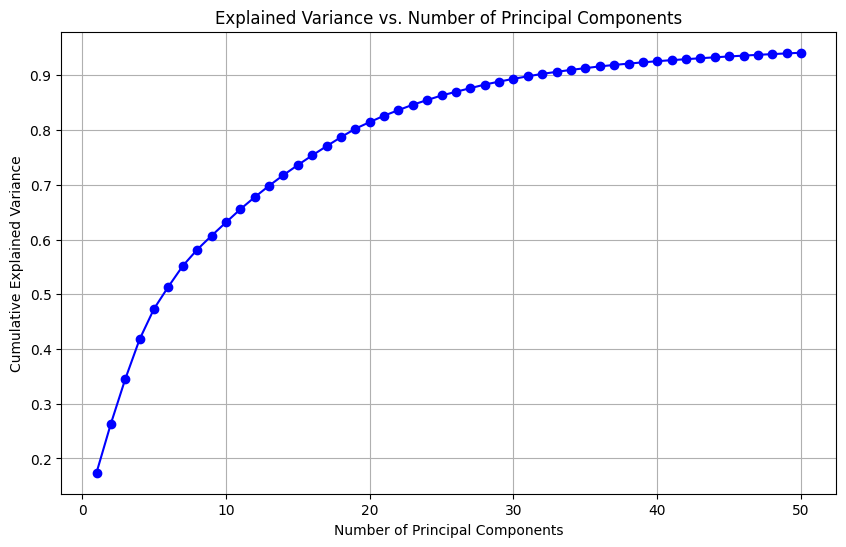

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title('Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [16]:
# This is how the new features look like
feature_indices = np.argsort(np.abs(scaling_dim_reduction.named_steps['pca'].components_), axis=1)[:, ::-1]

for i in range(3): 
    print(f"Indices for Principal Component {i + 1}: {feature_indices[i]}")

Indices for Principal Component 1: [2185    3    1 ... 1169  103 1972]
Indices for Principal Component 2: [2093 1888 2213 ... 1417  729  169]
Indices for Principal Component 3: [   0    2 2215 ... 1320  638 2049]


We'll use GridSearchCV to find the best combination of PCA components and classifier regularization(C). <br>

Result is: <br>
Best parameter (CV score=0.999): <br>
{'logistic__C': 0.0001, 'pca__n_components': 15}

In [1]:
from sklearn.model_selection import GridSearchCV

pca = PCA()
scaler = MinMaxScaler()

logistic = LogisticRegression(max_iter=10000, tol=0.1)
scaling_dim_reduction_pipeline = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

param_grid = {
    "pca__n_components": [15, 30, 35, 40, 45, 50],
    "logistic__C": np.logspace(-4, 4, 4),
}
search = GridSearchCV(scaling_dim_reduction_pipeline, param_grid, n_jobs=2)
#search.fit(X_train_pca, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train_pca)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

NameError: name 'PCA' is not defined

Testing the results from GridSearch by predicting on the validation set.

In [17]:
pca_pipeline = Pipeline(steps=[
    ("scaler", MinMaxScaler()),
    ("pca", PCA(n_components=15))
])

In [18]:
# Fit the pipeline on the training data
X_train_pca = pca_pipeline.fit_transform(X_train_pca, y_train)

# Transform and scale the validation data using the same transformation
X_val_pca = pca_pipeline.transform(X_val_pca)

In [19]:
X_val_pca.shape

(47272, 15)

In [21]:
logistic_regression = LogisticRegression(C=0.0001, max_iter=10000, tol=0.1)

In [22]:
logistic_regression.fit(X_train_pca, y_train)

# Make predictions
y_pred = logistic_regression.predict(X_val_pca)

In [23]:
y_train_pred = logistic_regression.predict(X_train_pca)

In [25]:
coefficients = logistic_regression.coef_.ravel()
intercept = logistic_regression.intercept_[0]

# Print the coefficients and intercept
print("Coefficients (Weights):", coefficients)
print("Intercept:", intercept)

Coefficients (Weights): [ 1.55604565e-03 -2.35852250e-04 -1.38289049e-04  7.25701809e-04
 -1.74955685e-04  6.56387028e-04  6.54795972e-05  3.96266887e-04
  6.06770935e-04 -1.89559277e-06 -2.23430450e-04 -7.43590957e-04
 -5.25770884e-04 -4.83955359e-04  2.78434493e-04]
Intercept: -6.885894551236634


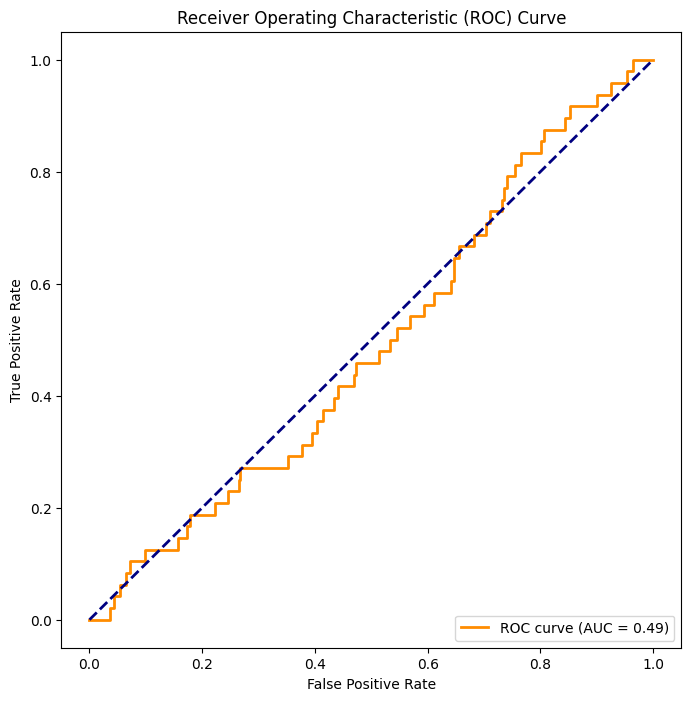

In [29]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = logistic_regression.predict_proba(X_val_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [38]:
print("Metrics on Training Data:")
print("-------------------------")

accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {accuracy_train:.4f}")

precision_train = precision_score(y_train, y_train_pred)
print(f"Precision: {precision_train:.4f}")

recall_train = recall_score(y_train, y_train_pred)
print(f"Recall: {recall_train:.4f}")

f1_train = f1_score(y_train, y_train_pred)
print(f"F1 Score: {f1_train:.4f}")

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):")
print(conf_matrix_train)
print("\n")

Metrics on Training Data:
-------------------------
Accuracy: 0.5827
Precision: 0.0009
Recall: 0.3867
F1 Score: 0.0019
Confusion Matrix (Training Data):
[[103227  73860]
 [   111     70]]




Metrics on Validation Data:

In [37]:
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_val, y_pred)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_val, y_pred)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_val, y_pred)
print(f"F1 Score: {f1:.4f}")

conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.5825
Precision: 0.0011
Recall: 0.4583
F1 Score: 0.0022
Confusion Matrix:
[[27516 19708]
 [   26    22]]


## Logistic Regression with PCA/Resampling

Results weren't very good, but that may be because of the imbalanced nature of the data. Let's see how much of a difference will resampling do.

In [35]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='auto')

X_train_rusampled, y_train_rusampled = rus.fit_resample(X_train_pca, y_train)

In [41]:
X_train_rusampled.shape

(362, 15)

In [42]:
logistic_regression2 = LogisticRegression(C=0.0001, max_iter=10000, tol=0.1)

# Fit the model on the undersampled training data
logistic_regression2.fit(X_train_rusampled, y_train_rusampled)

# Make predictions on the validation set
y_pred = logistic_regression2.predict(X_val_pca)

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score, average_precision_score
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
print("Precision:", precision)

recall = recall_score(y_val, y_pred)
print("Recall:", recall)

f1 = f1_score(y_val, y_pred)
print("F1-Score:", f1)

roc_auc = roc_auc_score(y_val, y_pred)
print("AUC-ROC:", roc_auc)

average_precision = average_precision_score(y_val, y_pred)
print("AUC-PR:", average_precision)
confusion_matrix = confusion_matrix(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)

Precision: 0.0009702457956015524
Recall: 0.3125
F1-Score: 0.001934485426876451
AUC-ROC: 0.49272086227342027
AUC-PR: 0.0010012894740126066
Accuracy: 0.6725757319343375
Confusion Matrix:
 [[31779 15445]
 [   33    15]]


The result is very low again. Seems 15 components from PCA were too few. Previously when we used the elbow method for finding optimal number of components during PCA, it showed ~30 components. Let's test if that will improve the model results. <br>
That's a biiitt better than the previous results.
 - PCA with 15 Components, Recall: 0.31; F1: 0.0019
 - PCA with 30 Component, Recall: 0.60; F1:0.002

In [9]:
X_train_pca = preprocessing_split_encoding.fit_transform(X_train)

In [11]:
X_val_pca = preprocessing_split_encoding.transform(X_val)

In [10]:
X_train_pca.shape

(177268, 2229)

In [13]:
X_val_pca.shape

(47272, 2229)

In [12]:
pca_pipeline = Pipeline(steps=[
    ("scaler", MinMaxScaler()),
    ("pca", PCA(n_components=30))
])

In [14]:
# Fit the pipeline on the training data
X_train_pca = pca_pipeline.fit_transform(X_train_pca, y_train)

# Transform and scale the validation data using the same transformation
X_val_pca = pca_pipeline.transform(X_val_pca)

In [19]:
X_val_pca.shape

(47272, 15)

In [15]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='auto')

X_train_rusampled, y_train_rusampled = rus.fit_resample(X_train_pca, y_train)

In [16]:
#Also lowering regularization
logistic_regression3 = LogisticRegression(random_state=42)

# Fit the model on the undersampled training data
logistic_regression3.fit(X_train_rusampled, y_train_rusampled)

# Make predictions on the validation set
y_pred = logistic_regression3.predict(X_val_pca)

In [22]:
y_train_pred = logistic_regression3.predict(X_train_pca)

In [28]:
print("Results on training set")
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy_train)

precision_train = precision_score(y_train, y_train_pred)
print("Precision:", precision)

recall_train = recall_score(y_train, y_train_pred)
print("Recall:", recall)

f1_train = f1_score(y_train, y_train_pred)
print("F1-Score:", f1_train)

confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:\n", confusion_matrix_train)

Results on training set
Accuracy: 0.47041767267639956
Precision: 0.0009322360807509322
Recall: 0.6041666666666666
F1-Score: 0.002465200297524174


TypeError: 'numpy.ndarray' object is not callable

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score, average_precision_score

# Evaluate the model
print("Results on validation set")
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_val, y_pred)
print("Precision:", precision)

recall = recall_score(y_val, y_pred)
print("Recall:", recall)

f1 = f1_score(y_val, y_pred)
print("F1-Score:", f1)

roc_auc = roc_auc_score(y_val, y_pred)
print("AUC-ROC:", roc_auc)

average_precision = average_precision_score(y_val, y_pred)
print("AUC-PR:", average_precision)

confusion_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", confusion_matrix)

Results on validation set
Precision: 0.0009322360807509322
Recall: 0.6041666666666666
F1-Score: 0.0018615996918731547
AUC-ROC: 0.47302395674515774
AUC-PR: 0.0009651552259038491
Accuracy: 0.34214757150110003
Confusion Matrix:
 [[16145 31079]
 [   19    29]]


## Random Forest

### Random Forest with Undersampling

First I wanted to perform undersampling for faster computation, the goal is to see which features are more important for the model, then do feature selection/engineering to reduce the dimensionality. However due to low amount of data the model overfit too much, and I found out feature importances from an overfit model may not accurately reflect the importance of features in making generalizable predictions.

In [ ]:
tf_transactions = preprocessing_whole_dataset.fit_transform(transactions)

print(tf_transactions)

In [12]:
X = tf_transactions.drop('Is Fraud?', axis=1)
y = tf_transactions['Is Fraud?']

# Create a train-test split (60-40)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Further split the temporary set into validation and test sets (40-60 of the remaining data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, stratify=y_temp, random_state=42)

# Display the sizes of the sets
print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Train set size: 177268
Validation set size: 47272
Test set size: 70908


In [10]:
X_train_selection = preprocessing_split_encoding.fit_transform(X_train)

In [11]:
X_val_selection = preprocessing_split_encoding.transform(X_val)

In [12]:
X_train_selection.shape

(177268, 2229)

In [ ]:
X_val_selection.head(1)

In [14]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='auto')

X_train_rusampled, y_train_rusampled = rus.fit_resample(X_train_selection, y_train)

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [21]:
rf_model.fit(X_train_rusampled, y_train_rusampled)

y_train_pred = rf_model.predict(X_train_rusampled)

y_val_pred = rf_model.predict(X_val_selection)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score, average_precision_score


train_f1 = f1_score(y_train_rusampled, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)

print(f'Training F1: {train_f1:.4f}')
print(f'Validation F1: {val_f1:.4f}')

Training F1: 1.0000
Validation F1: 0.0017


In [87]:
rf_model2 = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, min_samples_leaf=5, random_state=42)

In [88]:
rf_model2.fit(X_train_rusampled, y_train_rusampled)

y_train_pred = rf_model2.predict(X_train_rusampled)

y_val_pred = rf_model2.predict(X_val_selection)

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score, average_precision_score


train_f1_2 = f1_score(y_train_rusampled, y_train_pred)
val_f1_2 = f1_score(y_val, y_val_pred)

print(f'Training F1: {train_f1:.4f}')
print(f'Validation F1: {val_f1:.4f}')

Training F1: 1.0000
Validation F1: 0.0017


In [68]:
feature_importance = rf_model.feature_importances_

feature_importance = np.array(feature_importance)

# Normalize the importances to sum 1.00
normalized_importances = feature_importance / np.sum(feature_importance)

# Get the indices that would sort the normalized importances in descending order
sorted_indices = np.argsort(normalized_importances)[::-1]

# Filter out features with zero importance
nonzero_indices = sorted_indices[normalized_importances[sorted_indices] > 0.0009]

# Print and plot the normalized feature importances for non-zero values
for i in nonzero_indices:
    print(f"Feature {i}: {normalized_importances[i]}")

Feature 2223: 0.07218750102747334
Feature 2218: 0.06714320641424151
Feature 2221: 0.06564773327643977
Feature 2217: 0.06402788793320252
Feature 2228: 0.06312972764977226
Feature 2216: 0.05437687622049752
Feature 2215: 0.053296562193864826
Feature 2219: 0.051282139176008164
Feature 2222: 0.05093077985253405
Feature 2220: 0.04042889513582967
Feature 2227: 0.0402883142026638
Feature 2213: 0.03243096365508558
Feature 2225: 0.02979829458839
Feature 2214: 0.029499649679361927
Feature 2226: 0.028498888358569993
Feature 2224: 0.02772276514497876
Feature 2209: 0.011344983705503417
Feature 0: 0.010487544865177303
Feature 2207: 0.010343053570093876
Feature 2: 0.00982975702810426
Feature 2203: 0.007245652559072234
Feature 2210: 0.0063901578737207585
Feature 2096: 0.005967120996398138
Feature 2212: 0.005359388388479974
Feature 1888: 0.004997968881012032
Feature 2093: 0.00498281287050511
Feature 2185: 0.004779411163437412
Feature 1993: 0.004491216247119096
Feature 3: 0.004160345369181419
Feature 218

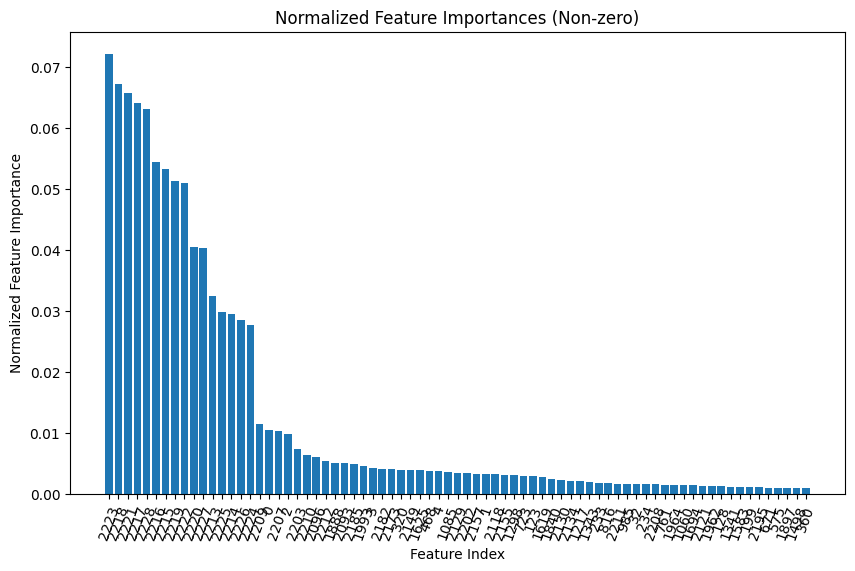

In [71]:
# We can use the elbow method here as well and see at what point the features stop providing significant information.

plt.figure(figsize=(10, 6))
plt.bar(range(len(nonzero_indices)), normalized_importances[nonzero_indices], align='center')
plt.xticks(range(len(nonzero_indices)), np.array(nonzero_indices))
plt.xticks(rotation=70)
plt.xlabel('Feature Index')
plt.ylabel('Normalized Feature Importance')
plt.title('Normalized Feature Importances (Non-zero)')
plt.show()

### Random Forest with Oversampling

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short. <br>
[More info about SMOTE](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

In [10]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [11]:
#No need if already transformed
X_train_selection = preprocessing_split_encoding.fit_transform(X_train)

In [12]:
#No need if already transformed
X_val_selection = preprocessing_split_encoding.transform(X_val)

In [13]:
has_strings = np.any(np.array([isinstance(item, str) for item in X_train_selection]))

if has_strings:
    print("The array has strings.")
else:
    print("The array does not have strings.")

The array does not have strings.


In [14]:
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_selection, y_train)

In [15]:
y_train_oversampled.value_counts()

Is Fraud?
0    177087
1    177087
Name: count, dtype: int64

In [22]:
def predict_rf(model, X_train, y_train):
    y_train_pred = model.predict(X_train)
    print("Confusion Matrix")
    print(confusion_matrix(y_train, y_train_pred))
    print("Classification Report")
    print(classification_report(y_train, y_train_pred))
    print('--'*30)
    # Plot precision-recall curve
    y_train_pred_prob = model.predict_proba(X_train)[:, 1]

    # Compute precision-recall pairs for different probability threshold
    precision, recall, _ = precision_recall_curve(y_train, y_train_pred_prob)

    # Plot precision-recall curve
    plt.figure(figsize=(12, 6))
    plt.plot(recall, precision, c='b')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    pr_score = average_precision_score(y_train, y_train_pred_prob)
    plt.title('Train PR curve: \n Average Precision-Recall Score = {0:0.2f}'.format(pr_score, fontsize=14))
    plt.grid(which='both', linestyle='-', color='g', linewidth=0.2)
    plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_model3 = RandomForestClassifier(n_estimators=100)

In [18]:
%%time
rf_model3.fit(X_train_oversampled, y_train_oversampled)

y_train_pred = rf_model3.predict(X_train_oversampled)

y_val_pred = rf_model3.predict(X_val_selection)

CPU times: user 3min 4s, sys: 3.98 s, total: 3min 8s
Wall time: 3min 10s


Confusion Matrix
[[177087      0]
 [     0 177087]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    177087
           1       1.00      1.00      1.00    177087

    accuracy                           1.00    354174
   macro avg       1.00      1.00      1.00    354174
weighted avg       1.00      1.00      1.00    354174

------------------------------------------------------------


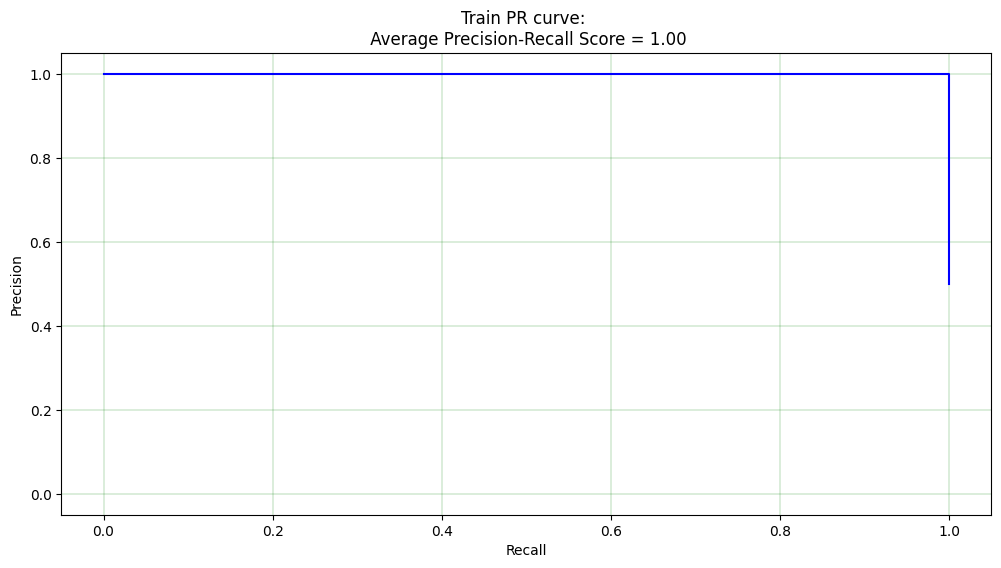

In [34]:
predict_rf(rf_model3, X_train_oversampled, y_train_oversampled)

Confusion Matrix
[[47224     0]
 [   48     0]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47224
           1       0.00      0.00      0.00        48

    accuracy                           1.00     47272
   macro avg       0.50      0.50      0.50     47272
weighted avg       1.00      1.00      1.00     47272

------------------------------------------------------------


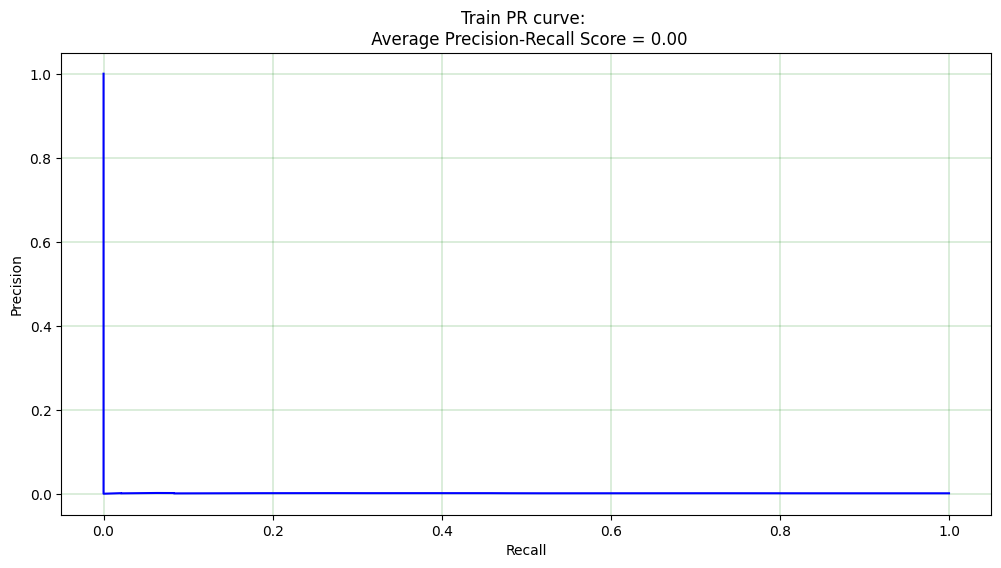

In [46]:
predict_rf(rf_model3, X_val_selection, y_val)

In [42]:
X_val_selection.shape

(47272, 2229)

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_model3 = RandomForestClassifier(n_estimators=100)

In [37]:
%%time
param_grid = {
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.5, 0.8]
}

# Create GridSearchCV object with Random Forest classifier and parameter grid
grid_search2 = GridSearchCV(estimator=rf_model3, param_grid=param_grid, cv=5, scoring='recall')

# Fit the GridSearchCV object to the training data
grid_search2.fit(X_train_oversampled, y_train_oversampled)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search2.best_params_)
print("Best Accuracy:", grid_search2.best_score_)

Best Parameters: {'max_features': 0.5}
Best Accuracy: 0.9994240055805644
CPU times: user 5h 55min 59s, sys: 2min 39s, total: 5h 58min 39s
Wall time: 5h 59min 50s


In [47]:
rf_model5 = RandomForestClassifier(n_estimators=100, max_features = 0.5)

In [48]:
%%time
rf_model5.fit(X_train_oversampled, y_train_oversampled)

y_train_pred = rf_model5.predict(X_train_oversampled)

y_val_pred = rf_model5.predict(X_val_selection)

CPU times: user 18min 42s, sys: 7.93 s, total: 18min 50s
Wall time: 18min 53s


Confusion Matrix
[[177087      0]
 [     0 177087]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    177087
           1       1.00      1.00      1.00    177087

    accuracy                           1.00    354174
   macro avg       1.00      1.00      1.00    354174
weighted avg       1.00      1.00      1.00    354174

------------------------------------------------------------


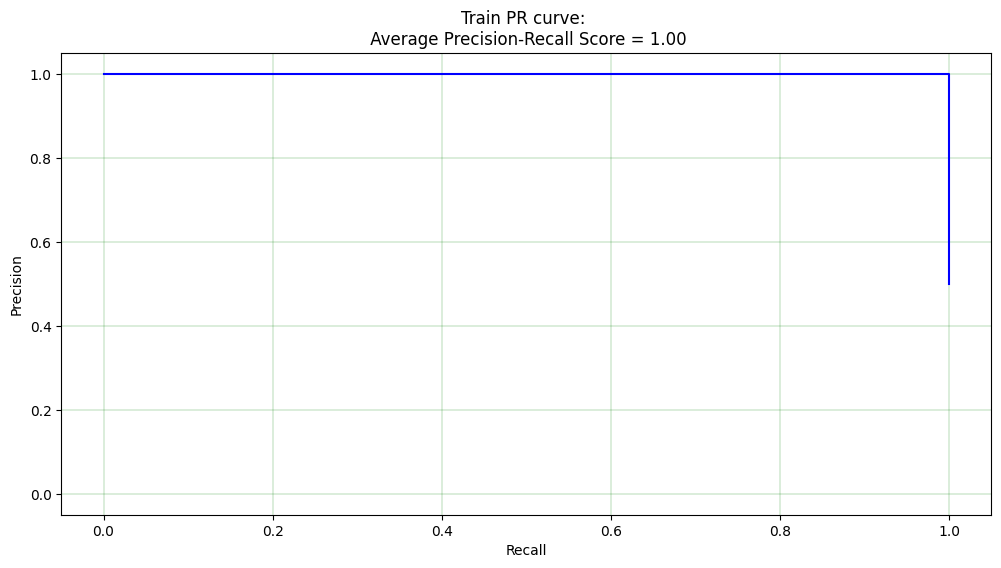

In [49]:
predict_rf(rf_model5, X_train_oversampled, y_train_oversampled)

Confusion Matrix
[[47224     0]
 [   48     0]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47224
           1       0.00      0.00      0.00        48

    accuracy                           1.00     47272
   macro avg       0.50      0.50      0.50     47272
weighted avg       1.00      1.00      1.00     47272

------------------------------------------------------------


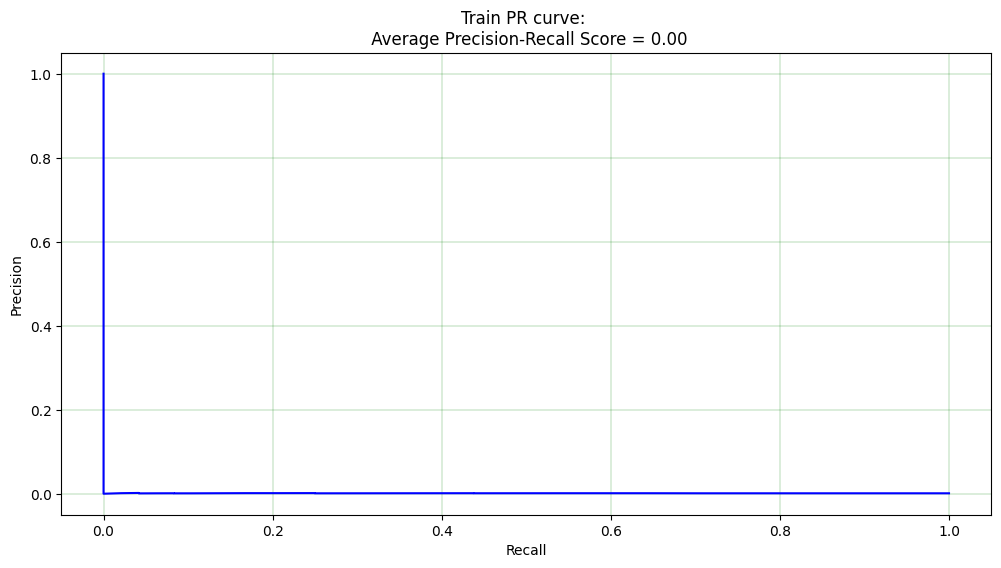

In [50]:
predict_rf(rf_model5, X_val_selection, y_val)

In [17]:
rf_model6 = RandomForestClassifier(n_estimators=100, max_depth=5, max_features = 0.5)

In [18]:
%%time
rf_model6.fit(X_train_oversampled, y_train_oversampled)

y_train_pred = rf_model6.predict(X_train_oversampled)

y_val_pred = rf_model6.predict(X_val_selection)

CPU times: user 1min 31s, sys: 574 ms, total: 1min 31s
Wall time: 1min 31s


Confusion Matrix
[[151983  25104]
 [ 18834 158253]]
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.86      0.87    177087
           1       0.86      0.89      0.88    177087

    accuracy                           0.88    354174
   macro avg       0.88      0.88      0.88    354174
weighted avg       0.88      0.88      0.88    354174

------------------------------------------------------------


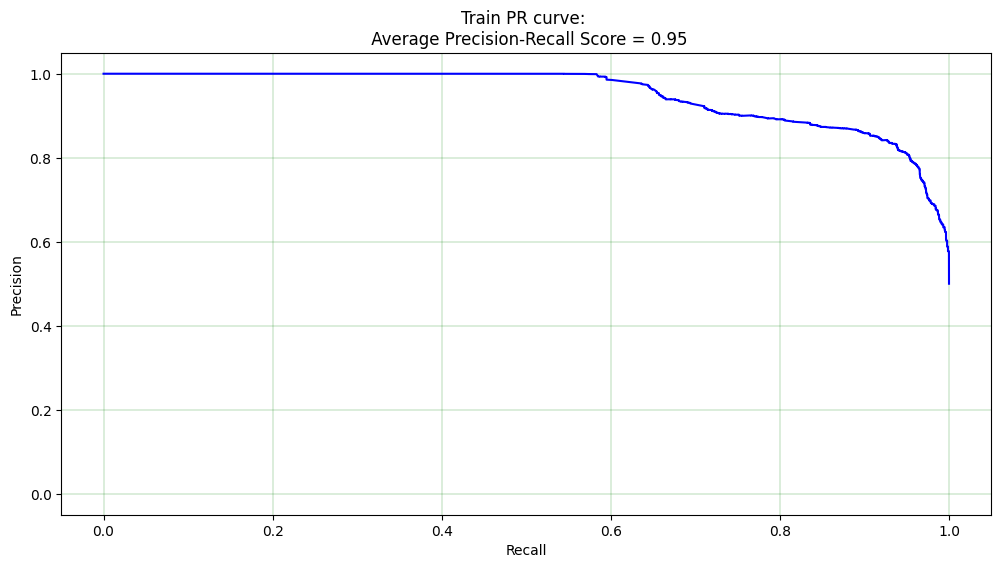

In [23]:
predict_rf(rf_model6, X_train_oversampled, y_train_oversampled)

Confusion Matrix
[[46628   596]
 [   48     0]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     47224
           1       0.00      0.00      0.00        48

    accuracy                           0.99     47272
   macro avg       0.50      0.49      0.50     47272
weighted avg       1.00      0.99      0.99     47272

------------------------------------------------------------


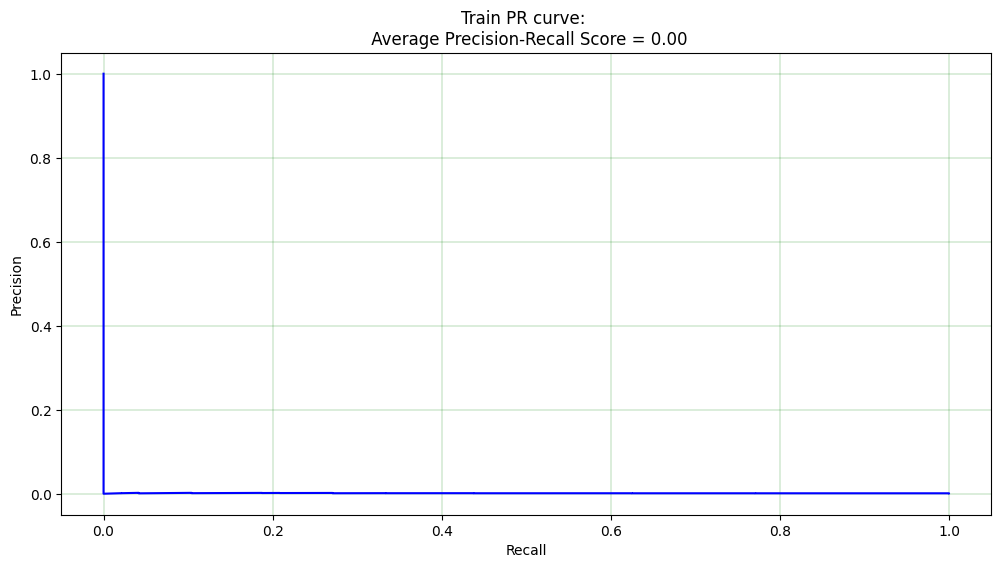

In [24]:
predict_rf(rf_model6, X_val_selection, y_val)

### Random Forest Evaluation

On all the instances I tested, model is overfitting, and has high variance both when Undersampled, and Oversampled. You can determine that from the 1.00 score on recall, this score is too improbable; additionally
the train set has way better scores than the validation set, which is a sign the model is overfitting. It has probably memorized the training data, and can't generalize well. Even when I limited the depth of the tree, and adjusted other hyperparameters it was overfit. In general it's not okay to use such low amount of data, almost always the model will just memorize. <br>

#### Why does overfitting occur? <br>

You only get accurate predictions if the machine learning model generalizes to all types of data within its domain. Overfitting occurs when the model cannot generalize and fits too closely to the training dataset instead. Overfitting happens due to several reasons, such as:
 - The training data size is too small and does not contain enough data samples to accurately represent all possible input data values.
 - The training data contains large amounts of irrelevant information, called noisy data.
 - The model trains for too long on a single sample set of data.
 - The model complexity is high, so it learns the noise within the training data.

#### Permutation Importance

A really useful method for feature selection is the the __Permutation Importance__ function, it assesses the importance of a feature by measuring the decrease in model performance (e.g., accuracy, F1 score) when the values of that feature are randomly shuffled. If shuffling a particular feature leads to a significant drop in model performance, that feature is considered important. The more repetitions you specify (n_repeats), the more accurate the estimate of permutation importances, but it also increases the computational cost. However the data we used is high-dimensional and it takes hours to calculate. I'll leave the code below if you're curious.


  [ from sklearn.inspection import permutation_importance
#perm_importance = permutation_importance(rf_model, X_val_selection, y_val, n_repeats=2, random_state=42)<br>
feature_names = X.columns  #Names of the columns in the dataset <br>
perm_importance_scores = perm_importance.importances_mean <br>
feature_importance_dict = dict(zip(feature_names, perm_importance_scores)) #Create dictionary <br>
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True) #Sort the dictionary by importance scores <br>
for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance:.4f}') #Display feature importances ]

Otherwise we can get the __Feature Importances__ directly and see how much they contributed to the decisions of the model. They are calculated based on the contribution of each feature to the reduction in impurity during the construction of the trees in the forest. The most common measure used for this purpose is the Gini impurity.
 - Gini impurity is a measure of how often a randomly chosen element would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the node. It ranges from 0 (pure node) to 0.5 (impure node).
 - The decrease in Gini impurity is used as a criterion for selecting the best feature to split on at each node of the decision trees in the Random Forest.
 - For each tree in the Random Forest, the total decrease in Gini impurity across all nodes where a particular feature is used for splitting is recorded.
 - The feature importance for a specific feature is the average (or sum, depending on the implementation) of the decrease in Gini impurity over all the trees in the forest.

In our specific case the dataset is sparse and the feature's aren't labeled, however we have a way of accesing the labels when we are applying the OneHotEncoder(this is how we dealt with the categorical features). Here's the code: 

[ column_names = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_cols)
column_names = list(column_names)
all_column_names = column_names + df.columns[len(categorical_cols):].tolist() #Add non-categorical column names <br>
print(all_column_names) #Print the column names ]<br>

# Conclusion

We tested different ML techniques like dimensionality reduction, resampling, scaling, encoding and evaluated this approach with models. Unfortunately for the moment there is no model that does a satisfactory job on generalizing on these datasets. So far the models either underfit (low F1 score) or overfit (high F1 score), however they have high variance, and learn the training data too well, capturing noise and specific patterns that do not generalize well to new, unseen data, which causes low scores when predicting on the validation set. To improve our models we can work on:
 - __Dataset__ with Feature importances, feature engineering, feature selection, PolyNomial Features - removing irrelevant or redundant features may help improve generalization
     - Notice how the score on Logistic Regression + Polynomial features without oversampling improved the model's capability to predict the negative class, and in turn it could predict the positive class with F1 score 0.5, still chaotic but better than other scores
 - __Models and hyperparameter tuning__ - choose a different, less complex model; test different levels of regularization
    - We could also try __ensemble modeling__ - which would combine two or more related but different analytical models and then synthesize the results into a single score.
 - __Size of data__ - if we train the model with more data it will learn the patterns better


# References
[1]. [Seventh report on card fraud](https://www.ecb.europa.eu/pub/pdf/cardfraud/ecb.cardfraudreport202110~cac4c418e8.en.pdf), ECB, October 2021 <br>
[2]. [Fraud Detection: Types Of Fraud, Detection Techniques & Systems](https://www.hyperverge.co/blog/types-of-fraud-detection-techniques-systems), article <br>
[3]. [Fraud Detection Methods](https://financialcrimeacademy.org/fraud-detection-methods/#:~:text=Pattern%20recognition%20algorithms%20detect%20approximate,used%20for%20fraud%20detection%20purposes), article <br> 
[4]. [How Banks Conduct Transaction Fraud Investigations](https://www.chargebackgurus.com/blog/transaction-fraud-investigations#:~:text=dispute%20is%20filed.-,How%20Do%20Banks%20Investigate%20Fraud%3F,was%20involved%20in%20the%20transaction), article <br>
[5]. [Payment Fraud](https://www.europol.europa.eu/crime-areas-and-statistics/crime-areas/forgery-of-money-and-means-of-payment/payment-fraud), article<br>
[6]. [Card fraud in Europe declines significantly](https://www.ecb.europa.eu/press/pr/date/2023/html/ecb.pr230526~f09bc3c664.en.html), article<br>
[7]. [Identity Theft and Credit Card Fraud Statistics](https://www.fool.com/the-ascent/research/identity-theft-credit-card-fraud-statistics/#:~:text=389%2C845-,Data%20source%3A%20Federal%20Trade%20Commission%20(2022).,increase%20from%202018%20to%202019), article <br>
[8]. Complete Guide to Transaction Monitoring.pdf, by [Sumsub](https://sumsub.com/) <br>
[9]. [An Easy Guide to Choose the Right Machine Learning Algorithm](https://www.kdnuggets.com/2020/05/guide-choose-right-machine-learning-algorithm.html), article <br>
[10]. [Softuni Data Science Training](https://softuni.bg/trainings/4059/data-science-june-2023), by Yordan Darakchiev <br>
[11]. [Solving financial fraud detection with machine learning methods](https://www.avenga.com/magazine/fraud-detection-machine-learning/), article<br>
[12]. [Feature Importance: 7 Methods and a Quick Tutorial](https://www.aporia.com/learn/feature-importance/feature-importance-7-methods-and-a-quick-tutorial/), article by Noa Azaria <br>
[13]. [Evaluating categorical encoding methods on a real credit card fraud
detection database](https://arxiv.org/pdf/2112.12024.pdf), by François de la Bourdonnaye, Fabrice Daniel <br>
[14]. [What is Overfitting?](https://aws.amazon.com/what-is/overfitting/), article by Amazon <br>
[15]. [Softuni Machine Learning Training](https://softuni.bg/opencourses/machine-learning), by Yordan Darakchiev
